# Problema de Negócio

Uma operadora de telecomunicações necessita de uma análise para a área de vendas da empresa com o intuito de reduzir a taxa de evasão de clientes, conhecido como **taxa de churn**. A **taxa de churn** indica quanto a empresa perdeu de receita ou de clientes em um certo período de tempo.

No atual cenário empresarial altamente competitivo e dinâmico, a retenção de clientes emergiu como um dos principais desafios enfrentados pelas organizações. Uma métrica crucial que auxilia as empresas a entenderem e abordarem esse desafio é a **taxa de churn**, também conhecida como taxa de rotatividade de clientes. A **taxa de churn** é um indicador que mede a proporção de clientes que deixaram de fazer negócios com uma empresa durante um determinado período, em relação ao número total de clientes que a empresa possuía no início desse período. Em outras palavras, ela quantifica a perda de clientes ao longo do tempo.

A **taxa de churn** é uma métrica crítica para as empresas, independentemente do setor em que operam, pois a retenção de clientes é essencial para o crescimento sustentável e a lucratividade a longo prazo. Uma **taxa de churn** alta pode ser um sinal preocupante, indicando que os esforços de aquisição de clientes não estão sendo acompanhados por estratégias eficazes de retenção. Além disso, a aquisição de novos clientes é geralmente mais cara do que a manutenção de clientes existentes, tornando a redução do churn uma abordagem econômica sensata para maximizar os lucros.

Através da análise detalhada da **taxa de churn**, as organizações podem identificar padrões, determinar fatores que contribuem para a perda de clientes e desenvolver estratégias proativas para melhorar a retenção, aumentando assim a satisfação do cliente, a fidelidade à marca e a saúde geral do negócio.

![churn](../img/churn.jpg)

# Objetivos

- **Identificação Proativa de Clientes em Risco de Evasão:**
Um dos principais focos deste projeto é desenvolver um modelo preditivo capaz de identificar de forma proativa os clientes que apresentam uma probabilidade mais elevada de deixar nossa empresa. Isso será realizado através da análise de características específicas extraídas de nossa base de dados. Ao antecipar quais clientes estão em risco de evasão, seremos capazes de direcionar esforços e estratégias de retenção de maneira mais eficaz, garantindo um relacionamento mais sólido e duradouro com nossa base de clientes.

- **Análise de Drivers de Churn para Melhoria da Retenção de Clientes:**
Outro objetivo crucial deste projeto é compreender a fundo as variáveis que têm maior influência no processo de evasão de clientes. Através de análises detalhadas, buscamos identificar as variáveis que desempenham um papel determinante na decisão dos clientes de deixar nossa empresa. Ao identificar esses pontos de impacto, poderemos desenvolver estratégias mais direcionadas e personalizadas, visando mitigar a taxa de evasão. Ao tomar medidas para abordar os fatores mais relevantes, esperamos reduzir significativamente a taxa de churn e fortalecer a fidelidade de nossos clientes.

# Dados

Os dados utilizados nesse projeto se encontram <a href='https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv' target='_blank'>nesse link</a>.

A base de dados possui o número de identificação do cliente e se o cliente deixou ou não a empresa, e ainda, informações sobre:

- **customerID:** é o id único de cada cliente;
- **Churn:** indica se o cliente deixou de ser cliente da empresa ou não;
- **customer:** contém informações específicas do cliente que se subdividem em:
    - **Dependents:** se o cliente possui ou não dependentes;
    - **Partner:** se o cliente possui ou não parceiro ou parceira;
    - **SeniorCitizen:** informação sobre um cliente ter ou não ter idade acima dos 65 anos;
    - **gender:** gênero do cliente;
    - **tenure:** meses de contrato do cliente.
- **phone:** contém informações relacionadas aos serviços telefonicos do cliente:
    - **MultipleLines:** assinatura de multiplas linhas telefônicas;
    - **PhoneService:** assinatura de serviço telefônico;
- **internet:** contém informações relacionadas aos serviços de internet do cliente:
    - **DeviceProtection:** assinatura adicional de proteção do dispostivo;
    - **InternetService:** assinatura de um provedor de internet e qual;
    - **OnlineBackup:** assinatura adicional de backup online;
    - **OnlineSecurity:** assinatura adicional de segurança online;
    - **StreamingMovies:** assinatura adicional de serviço de streaming de filmes;
    - **StreamingTV:** assinatura adicional de serviço de streaming de TV;
    - **TechSupport:** assinatura adicional de suporte técnico.
- **account:** possui informações da conta do cliente:
    - **Charges:** possui informações dos encargos:
        - **Monthly:** encargos mensais;
        - **Total:** encargos totais.
    - **Contract:** tipo de contrato;
    - **PaperlessBilling:** se possui recebimento de conta em papel;
    - **PaymentMethod:** informações sobre o métodos de pagamento.

# 0. Bibliotecas, Funções e Cargas

Para iniciar o estudo dos dados, se faz necessário carregar o conjunto de dados com auxílio de algumas bibliotecas utilizadas para isso. Também, será importado um arquivo chamado 'utils.py' onde estão armazenadas as funções que serão utilizadas ao longo do projeto.

## 0.1. Bibliotecas

In [98]:
import pandas as pd
import numpy  as np

from sklearn.preprocessing import MinMaxScaler
from scipy.stats           import chisquare, chi2_contingency, mannwhitneyu
from utils                 import *
from dython                import nominal
from featurewiz            import featurewiz

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from imblearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from featurewiz import featurewiz

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', None)

## 0.2. Funções

In [99]:
# 
def has_service(item):
    if item == 'Yes':
        return 1
    else:
        return 0

## 0.3. Carga de Dados

In [100]:
# carregando os dados
data_root = pd.read_json('https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json')

# verificando as primeiras linhas
data_root.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [101]:
# verificando a quantidade de linhas e colunas e tamanho em memória
print(f'Formato do arquivo: {data_root.shape[0]} linhas e {data_root.shape[1]} colunas')
print(f'Tamanho: {data_root.size}')

Formato do arquivo: 7267 linhas e 6 colunas
Tamanho: 43602


# 1. Descição dos Dados

In [102]:
# backup dos dados
data_01 = data_root.copy()

# verificando
data_01.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Existem algumas colunas que possuem dados no formato de JSON e é necessário seguir algumas etapas para lidar com isso:
- Análise de cada uma dessas colunas para verificar o conteúdo das mesmas;
- Criação de uma função para realizar a extração de forma automática;
- Extração dos dados dessas colunas transformando-os em novas colunas com o nome de sua chave.

In [103]:
# verificando os valores da coluna 'customer'
data_01.customer.loc[0]

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

In [104]:
# verificando os valores da coluna 'phone'
data_01.phone.loc[0]

{'PhoneService': 'Yes', 'MultipleLines': 'No'}

In [105]:
# verificando os valores da coluna 'internet'
data_01.internet.loc[0]

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

In [106]:
# verificando os valores da coluna 'account'
data_01.account.loc[0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

No primeiro conjunto de dados carregados, existem 6 colunas, algumas delas, com subcolunas. São elas:
- **customerID:** é o id único de cada cliente;
- **Churn:** indica se o cliente deixou de ser cliente da empresa ou não;
- **customer:** contém informações específicas do cliente que se subdividem em:
    - **Dependents:** se o cliente possui ou não dependentes;
    - **Partner:** se o cliente possui ou não parceiro ou parceira;
    - **SeniorCitizen:** informação sobre um cliente ter ou não ter idade acima dos 65 anos;
    - **gender:** gênero do cliente;
    - **tenure:** meses de contrato do cliente.
- **phone:** contém informações relacionadas aos serviços telefonicos do cliente:
    - **MultipleLines:** assinatura de multiplas linhas telefônicas;
    - **PhoneService:** assinatura de serviço telefônico;
- **internet:** contém informações relacionadas aos serviços de internet do cliente:
    - **DeviceProtection:** assinatura adicional de proteção do dispostivo;
    - **InternetService:** assinatura de um provedor de internet e qual;
    - **OnlineBackup:** assinatura adicional de backup online;
    - **OnlineSecurity:** assinatura adicional de segurança online;
    - **StreamingMovies:** assinatura adicional de serviço de streaming de filmes;
    - **StreamingTV:** assinatura adicional de serviço de streaming de TV;
    - **TechSupport:** assinatura adicional de suporte técnico.
- **account:** possui informações da conta do cliente:
    - **Charges:** possui informações dos encargos:
        - **Monthly:** encargos mensais;
        - **Total:** encargos totais.
    - **Contract:** tipo de contrato;
    - **PaperlessBilling:** se possui recebimento de conta em papel;
    - **PaymentMethod:** informações sobre o métodos de pagamento.


In [107]:
# aplicando a função para a extração dos dados das colunas
data_01 = extract_dict(data_01)

# verificando as primeiras linhas
data_01.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 1.1. Renomear Colunas

Para facilitar o manuseio das colunas, os nomes de cada coluna que estão em inglês, serão traduzidos para o português.

In [108]:
# verificando o nome de todas as colunas
data_01.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total'],
      dtype='object')

In [109]:
# traduzindo o nome das colunas
names = {
    'customerID': 'id',                         # categórica discreta
    'Churn': 'churn',                           # categórica nominal
    'gender': 'genero',                         # categórica nominal
    'SeniorCitizen': 'idoso',                   # categórica nominal
    'Partner': 'parceiro',                      # categórica nominal
    'Dependents': 'dependente',                 # categórica nominal
    'tenure': 'permanencia',                    # numérica continua
    'PhoneService': 'servico_telefonico',       # categórica nominal
    'MultipleLines': 'multiplas_linhas',        # categórica nominal
    'InternetService': 'servico_internet',      # categórica nominal
    'OnlineSecurity': 'seguranca_online',       # categórica nominal
    'OnlineBackup': 'backup_online',            # categórica nominal
    'DeviceProtection': 'protecao_dispositivo', # categórica nominal
    'TechSupport': 'suporte_tecnico',           # categórica nominal
    'StreamingTV': 'tv_streaming',              # categórica nominal
    'StreamingMovies': 'filme_streaming',       # categórica nominal
    'Contract': 'contrato',                     # categórica nominal
    'PaperlessBilling': 'conta_papel',          # categórica nominal
    'PaymentMethod': 'metodo_pagamento',        # categórica nominal
    'Monthly': 'mensal',                        # numérica continua
    'Total': 'total'                            # numérica continua
}

# renomeando o nome das colunas
data_01.rename(columns = names, inplace = True)

# verificando as primeiras linhas
data_01.head()

,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 1.2. Dimensão dos Dados

In [110]:
# verificando a quantidade de linhas e colunas
print(f'Formato do arquivo: {data_01.shape[0]} linhas e {data_01.shape[1]} colunas')

Formato do arquivo: 7267 linhas e 21 colunas


## 1.3. Tipo dos Dados

In [111]:
# verificando algumas informações básicas dos dados
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7267 non-null   object 
 1   churn                 7267 non-null   object 
 2   genero                7267 non-null   object 
 3   idoso                 7267 non-null   int64  
 4   parceiro              7267 non-null   object 
 5   dependente            7267 non-null   object 
 6   permanencia           7267 non-null   int64  
 7   servico_telefonico    7267 non-null   object 
 8   multiplas_linhas      7267 non-null   object 
 9   servico_internet      7267 non-null   object 
 10  seguranca_online      7267 non-null   object 
 11  backup_online         7267 non-null   object 
 12  protecao_dispositivo  7267 non-null   object 
 13  suporte_tecnico       7267 non-null   object 
 14  tv_streaming          7267 non-null   object 
 15  filme_streaming      

É possível notar que algumas colunas estão em formatos que não condizem com o tipo de dado que contém. Será feito uma análise um pouco mais profunda para entender melhor o que está acontecendo. Primeiro irei analisar se as colunas possuem valores nulos.

## 1.4. Existência de Dados nulos

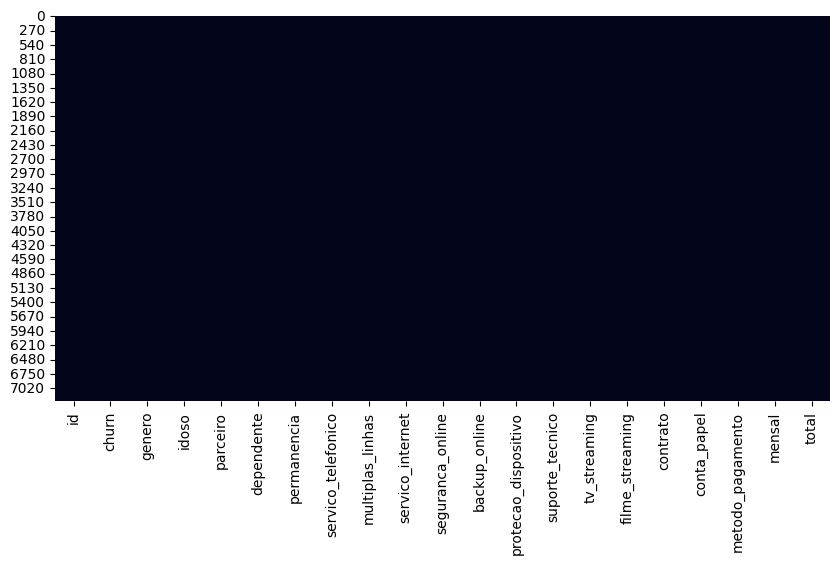

In [112]:
# plotando gráfico para visualizar valores nulos
plt.figure(figsize = (10, 5))

sns.heatmap(data_01.isna(), cbar = False)

plt.show()

## 1.5. Manipulação de Dados

In [113]:
# backup de dados
data_01 = data_01.copy()

# verificando
data_01.head()

,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Aparentemente, o conjunto de dados não possui nenhum dado nulo, porém, será necessário análisá-lo de forma mais profunda para realmente ter essa certeza.

Para explorar cada coluna e saber de forma detalhada o que essa coluna possui, quais são os tipos de dados que estão armazenados nelas, os valores que possum e qual a sua cardinalidade, no caso de dados categóricos, foi criada uma função para fazer isso de forma automatizada.

In [114]:
# análise detalhada de cada coluna
columns_descriptions = []

for column in data_01.columns:
    column_description = column_analysis(data_01, column)
    columns_descriptions.append(column_description)

pd.DataFrame(columns_descriptions, columns = ['nome', 'cardinalidade', 'dados_unicos', 'dados_nulos', 'tipo'])

,nome,cardinalidade,dados_unicos,dados_nulos,tipo
0,id,7267,['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9...,0,object
1,churn,3,['No' 'Yes' ''],0,object
2,genero,2,['Female' 'Male'],0,object
3,idoso,2,[0 1],0,int64
4,parceiro,2,['Yes' 'No'],0,object
5,dependente,2,['Yes' 'No'],0,object
6,permanencia,73,[ 9 4 13 3 71 63 7 65 54 72 5 56 34 1 45 ...,0,int64
7,servico_telefonico,2,['Yes' 'No'],0,object
8,multiplas_linhas,3,['No' 'Yes' 'No phone service'],0,object
9,servico_internet,3,['DSL' 'Fiber optic' 'No'],0,object


Abaixo, estão listados o que é necessário realizar em cada coluna para que ela entre na conformidade.
- **id**: ✓
- **churn**: possui valores vazios ('')
- **genero**: ✓
- **idoso**: transformar [0 1] em ['No' 'Yes']
- **parceiro**: ✓
- **dependente**: ✓
- **permanencia**: ✓
- **servico_telefonico**: ✓
- **multipĺas_linhas**: transformar para dados categóricos*
- **servico_internet**: transformar para dados categóricos*
- **seguranca_online**: transformar para dados categóricos*
- **backup_online**: transformar para dados categóricos*
- **protecao_dispositivo**: transformar para dados categóricos*
- **suporte_tecnico**: transformar para dados categóricos*
- **tv_streaming**: transformar para dados categóricos*
- **filme_streaming**: transformar para dados categóricos*
- **contrato**: transformar para dados categóricos*
- **conta_papel**: ✓
- **metodo_pagamento**: transformar para dados categóricos*
- **mensal**: ✓
- **total**: transformar para float64

### 1.5.1. Colunas

### 1.5.1.1. Coluna **'churn'**

Serão tratados os dados nulos da coluna 'churn', para que essas células fiquem rastreáveis como 'nan'.

In [115]:
# transformando valores '' para 'nan'
data_01.churn = data_01.churn.replace({'': np.nan})

In [116]:
# verificando a transformação
data_01.churn.value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

Usando a função 'value_counts()' não é possível observar os valores nulos. Para verificar quantos valores nulos existem, será utilizada a função 'groupby' com o parâmetro 'dropna = False'.

In [117]:
# verificando o conteúdo da coluna 'churn'
data_01.groupby(['churn'], dropna=False).size()

churn
No     5174
Yes    1869
NaN     224
dtype: int64

É possível observar que existem 224 campos com valores nulos nessa coluna. Como essa coluna é nossa coluna target, não é possível tomar outra atitude senão descartar as linhas que possuem esses valores nulos, porém, serão utilizados posteriormente como forma de validação do modelo.

In [118]:
# separando os dados que possuem o valor da coluna target igual a 'NaN' ***
data_01 = data_01[~data_01.churn.isna()]

### 1.5.1.2. Coluna **'idoso'**

In [119]:
# transformando valores binários para 'No' e 'Yes'
data_01.idoso = data_01.idoso.replace({0: 'No', 1: 'Yes'})

### 1.5.1.3. Coluna **'total'**

Pela primeira análise, foi possível observar que a coluna 'total' está no formato 'object', porém, é necessário que ela fique no formato 'float'. Para isso, será utilizado a função 'pd.to_numeric(coluna)' para transformar os dados em numéricos.

In [120]:
# passando os valores da coluna de 'object' para 'float'
# após rodar a primeira vez a função pd.to_numeric(coluna) foi observado um erro, para contorná-lo,
# utilizou-se o parâmetro "errors = 'coerce'" para preencher as linhas que deram erro como 'nan'
try:
    data_01.total = pd.to_numeric(data_01.total)
except Exception as e:
    print(e)

Unable to parse string " " at position 945


A partir do erro mostrado pela utilização da função 'pd.to_numeric(coluna)', é possível notar que existem células que contém ' ' na coluna 'total'. Se faz necessário uma análise mais profunda dessa coluna.

In [121]:
# analise descritiva da coluna 'total'
data_01.total.describe()

count     7043
unique    6531
top           
freq        11
Name: total, dtype: object

Existe uma frequência de 11 vezes de um valor vazio. Então será necessário analisar melhor para entender o porque disso.

In [122]:
# verificando as linhas que contém valores vazios do tipo ' '
data_01[data_01.total == ' ']

,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total
975,1371-DWPAZ,No,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [123]:
# verificando o tamanho do conjunto de dados que possui permanencia igual a 0 e o valor da coluna 'total' igual a vazio
print(f'{data_01[(data_01.total == " ") & (data_01.permanencia == 0)].shape[0]}' + ' linhas.')

11 linhas.


Analisando os valores das outras colunas quando a coluna 'total' possui os valores vazios, é possível observar que o tempo de permanência dessas linhas possui o valor 0. Isso indica que a pessoa acabou de entrar na base de dados, então, não possui um valor total ainda. Sendo assim, será preenchido os valores dessas colunas com o valor da coluna 'mensal', indicando o valor total de gasto daquela pessoa até o momento. Mas primeiro, será necessário trocar os valores vazios para 'nan'.

In [124]:
# preenchendo os valores vazios com 'nan'
data_01.total = data_01.total.replace({' ': np.nan})

# preenchendo os valores da coluna 'total' com os da coluna 'mensal'
data_01.loc[data_01.total.isna(), 'total'] = data_01.mensal

In [125]:
# checando o passo anterior
data_01[data_01.total.isna()]

,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total


Agora, veja se será possível colocá-la no formato 'float'.

In [126]:
# transformando a coluna para numerica
data_01.total = data_01.total.astype(float)

In [127]:
# verificando o passo anterior
data_01[data_01.permanencia == 0]

,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total
975,1371-DWPAZ,No,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05
1775,2520-SGTTA,No,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00
1955,2775-SEFEE,No,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,61.90
2075,2923-ARZLG,No,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70
2232,3115-CZMZD,No,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25
2308,3213-VVOLG,No,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35
2930,4075-WKNIU,No,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35
3134,4367-NUYAO,No,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75
3203,4472-LVYGI,No,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55
4169,5709-LVOEQ,No,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85


Agora, com todas as colunas em seus devidos formatos, será necessário realizar uma última verificação nas informações dos dados para certificar que tudo o que foi feito surtiu efeito.

In [128]:
# verificando
data_01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7043 non-null   object 
 1   churn                 7043 non-null   object 
 2   genero                7043 non-null   object 
 3   idoso                 7043 non-null   object 
 4   parceiro              7043 non-null   object 
 5   dependente            7043 non-null   object 
 6   permanencia           7043 non-null   int64  
 7   servico_telefonico    7043 non-null   object 
 8   multiplas_linhas      7043 non-null   object 
 9   servico_internet      7043 non-null   object 
 10  seguranca_online      7043 non-null   object 
 11  backup_online         7043 non-null   object 
 12  protecao_dispositivo  7043 non-null   object 
 13  suporte_tecnico       7043 non-null   object 
 14  tv_streaming          7043 non-null   object 
 15  filme_streaming       7043

Com os dados limpos, agora é preciso separar os dados que contém a variável target nula, pois neste momento, não serão utilizados.

In [129]:
# dados que não possuem a variável target 'churn' nula
data_01 = data_01[~data_01.churn.isna()]

# dados que possuem a variável target 'churn' nula
data_validation = data_01[data_01.churn.isna()]

## 1.6. Estatística Descritiva

In [130]:
# organizando as variáveis por tipo
target_column = ['churn']
categorical_columns = ['genero', 'idoso', 'parceiro', 'dependente', 'servico_telefonico', 'conta_papel', 'multiplas_linhas', 'servico_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming', 'filme_streaming', 'contrato', 'metodo_pagamento']
dichotomic_columns = ['genero', 'idoso', 'parceiro', 'dependente', 'servico_telefonico', 'conta_papel']
polichotomic_columns = ['multiplas_linhas', 'servico_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming', 'filme_streaming', 'contrato', 'metodo_pagamento']
numerical_columns = ['permanencia', 'mensal', 'total']

In [131]:
# separando o dataframe em variáveis numéricas e categóricas
num_attributes = data_01[numerical_columns]
cat_attributes = data_01[categorical_columns]

### 1.6.1. Atributos Numéricos

In [132]:
# central tendency - mean, median
central_tendency_01 = pd.DataFrame(num_attributes.apply(np.mean)).T
central_tendency_02 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
dispersion_01 = pd.DataFrame(num_attributes.apply(np.std)).T
dispersion_02 = pd.DataFrame(num_attributes.apply(np.min)).T
dispersion_03 = pd.DataFrame(num_attributes.apply(np.max)).T
dispersion_04 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
dispersion_05 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
dispersion_06 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenando
descriptive_statistics = pd.concat([dispersion_02, dispersion_03, dispersion_04, central_tendency_01, central_tendency_02, dispersion_01, dispersion_05, dispersion_06]).T.reset_index()
descriptive_statistics.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

# verificando
descriptive_statistics

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,permanencia,0.00,72.00,72.0,32.371149,29.00,24.557737,0.239540,-1.387372
1,mensal,18.25,118.75,100.5,64.761692,70.35,30.087911,-0.220524,-1.257260
2,total,18.80,8684.80,8666.0,2279.798992,1394.55,2266.569243,0.963316,-0.228487


### 1.6.2. Atributos Categóricos

In [133]:
# análise detalhada de cada coluna categŕoica
columns_descriptions = []

for column in cat_attributes.columns:
    column_description = column_analysis(data_01, column)
    columns_descriptions.append(column_description)

pd.DataFrame(columns_descriptions, columns = ['nome', 'cardinalidade', 'dados_unicos', 'dados_nulos', 'tipo'])

,nome,cardinalidade,dados_unicos,dados_nulos,tipo
0,genero,2,['Female' 'Male'],0,object
1,idoso,2,['No' 'Yes'],0,object
2,parceiro,2,['Yes' 'No'],0,object
3,dependente,2,['Yes' 'No'],0,object
4,servico_telefonico,2,['Yes' 'No'],0,object
5,conta_papel,2,['Yes' 'No'],0,object
6,multiplas_linhas,3,['No' 'Yes' 'No phone service'],0,object
7,servico_internet,3,['DSL' 'Fiber optic' 'No'],0,object
8,seguranca_online,3,['No' 'Yes' 'No internet service'],0,object
9,backup_online,3,['Yes' 'No' 'No internet service'],0,object


# 2. Feature Engineering

In [134]:
# backup dos dados
data_02 = data_01.copy()

# verificando as primeiras linhas
data_02.head()

,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## 2.1. Criação de novas variáveis

In [135]:
# criando uma nova variável
data_02['interacao_charges'] = data_02['mensal'] * data_02['total']

# criando uma nova variável   
data_02['engajamento'] = pd.concat([
    data_02.multiplas_linhas.apply(has_service),
    data_02.seguranca_online.apply(has_service),
    data_02.backup_online.apply(has_service),
    data_02.protecao_dispositivo.apply(has_service),
    data_02.suporte_tecnico.apply(has_service),
    data_02.tv_streaming.apply(has_service),
    data_02.filme_streaming.apply(has_service)
], axis=1).sum(axis=1)

## 2.1. Hipóteses

- H1: Pessoas idosas tendem a ter uma taxa de churn mais alta do que pessoas jovens.
- H2: Pessoas que possuem parceiros tendem a ter uma taxa de churn mais alta do que pessoas sem parceiros.
- H3: Pessoas que possuem dependentes tendem a ter uma taxa de churn mais alta do que pessoas que não possuem dependentes.
- H4: Pessoas com permanencia menor, tendem a ter uma taxa de churn mais alta do que pessoas com permanencia maior.
- H5: Pessoas que possuem multiplas linhas tem uma taxa de churn maior do que as pessoas que não possuem multiplas linhas.
- H6: Pessoas que só assinam o serviço telefônico tem uma taxa de churn menor que as pessoas que possum serviço telefônico e internet.
- H7: Pessoas que possuem assinatura de internet, geralmente também possui serviço telefônico.
- H8: Pessoas que possuem todos os serviços de internet tem uma taxa de churn maior do que os que possuem somente alguns.
- H9: Pessoas com idade mais jovem geralmente possui assinatura de streaming.
- H10: Pessoas com contratos do tipo mensal tem uma taxa de churn maior do que pessoas que possuem contratos anuais.
- H11: Pessoas que possuem cobranças que não são automáticas, possuem uma taxa de churn maior.

# 3. Filtragem de Variáveis

In [136]:
# backup dos dados
data_03 = data_02.copy()

# verificando as primeiras linhas
data_03.head()

,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total,interacao_charges,engajamento
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,38920.480,3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,32489.760,2
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,20754.815,1
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,121309.300,4
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,22434.860,2


## 3.1. Linhas

In [137]:
# dropando a variável id que não tem nenhum valor para a modelagem
data_03 = data_03.drop(columns=['id'])

# verificando as primeiras linhas
data_03.head()

,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total,interacao_charges,engajamento
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,38920.480,3
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,32489.760,2
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,20754.815,1
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,121309.300,4
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,22434.860,2


## 3.2. Colunas

Todas as colunas serão utilizadas.

# 4. Exploração dos Dados

In [138]:
# backup dos dados
data_04 = data_03.copy()

# verificando as primeiras linhas
data_04.head()

,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total,interacao_charges,engajamento
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,38920.480,3
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,32489.760,2
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,20754.815,1
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,121309.300,4
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,22434.860,2


## 4.1. Análise Univariada

### 4.1.1. Análise da variável resposta

Verificando a distribuição da variável 'churn' que é a variável resposta.

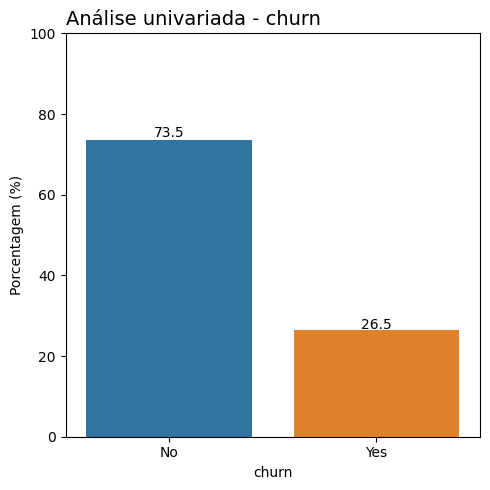

In [139]:
# distribuição da coluna target
plt.figure(figsize = (5, 5))
for position, column in enumerate(target_column):
    plt.subplot(1, 1, position + 1)
    plot_bar(data_04, column)

plt.tight_layout()

A variável 'churn', que é a variável target, possui uma taxa de 26,5% de clientes que deixaram a base de dados, cerca de 1/4 da base. Isso mostra que ela está desbalanceada, sinalizando um alerta na hora do treinamento do modelo.

### 4.1.2. Análise das variáveis categóricas

Segue abaixo a analise das variáveis das colunas que contém valores categóricos.

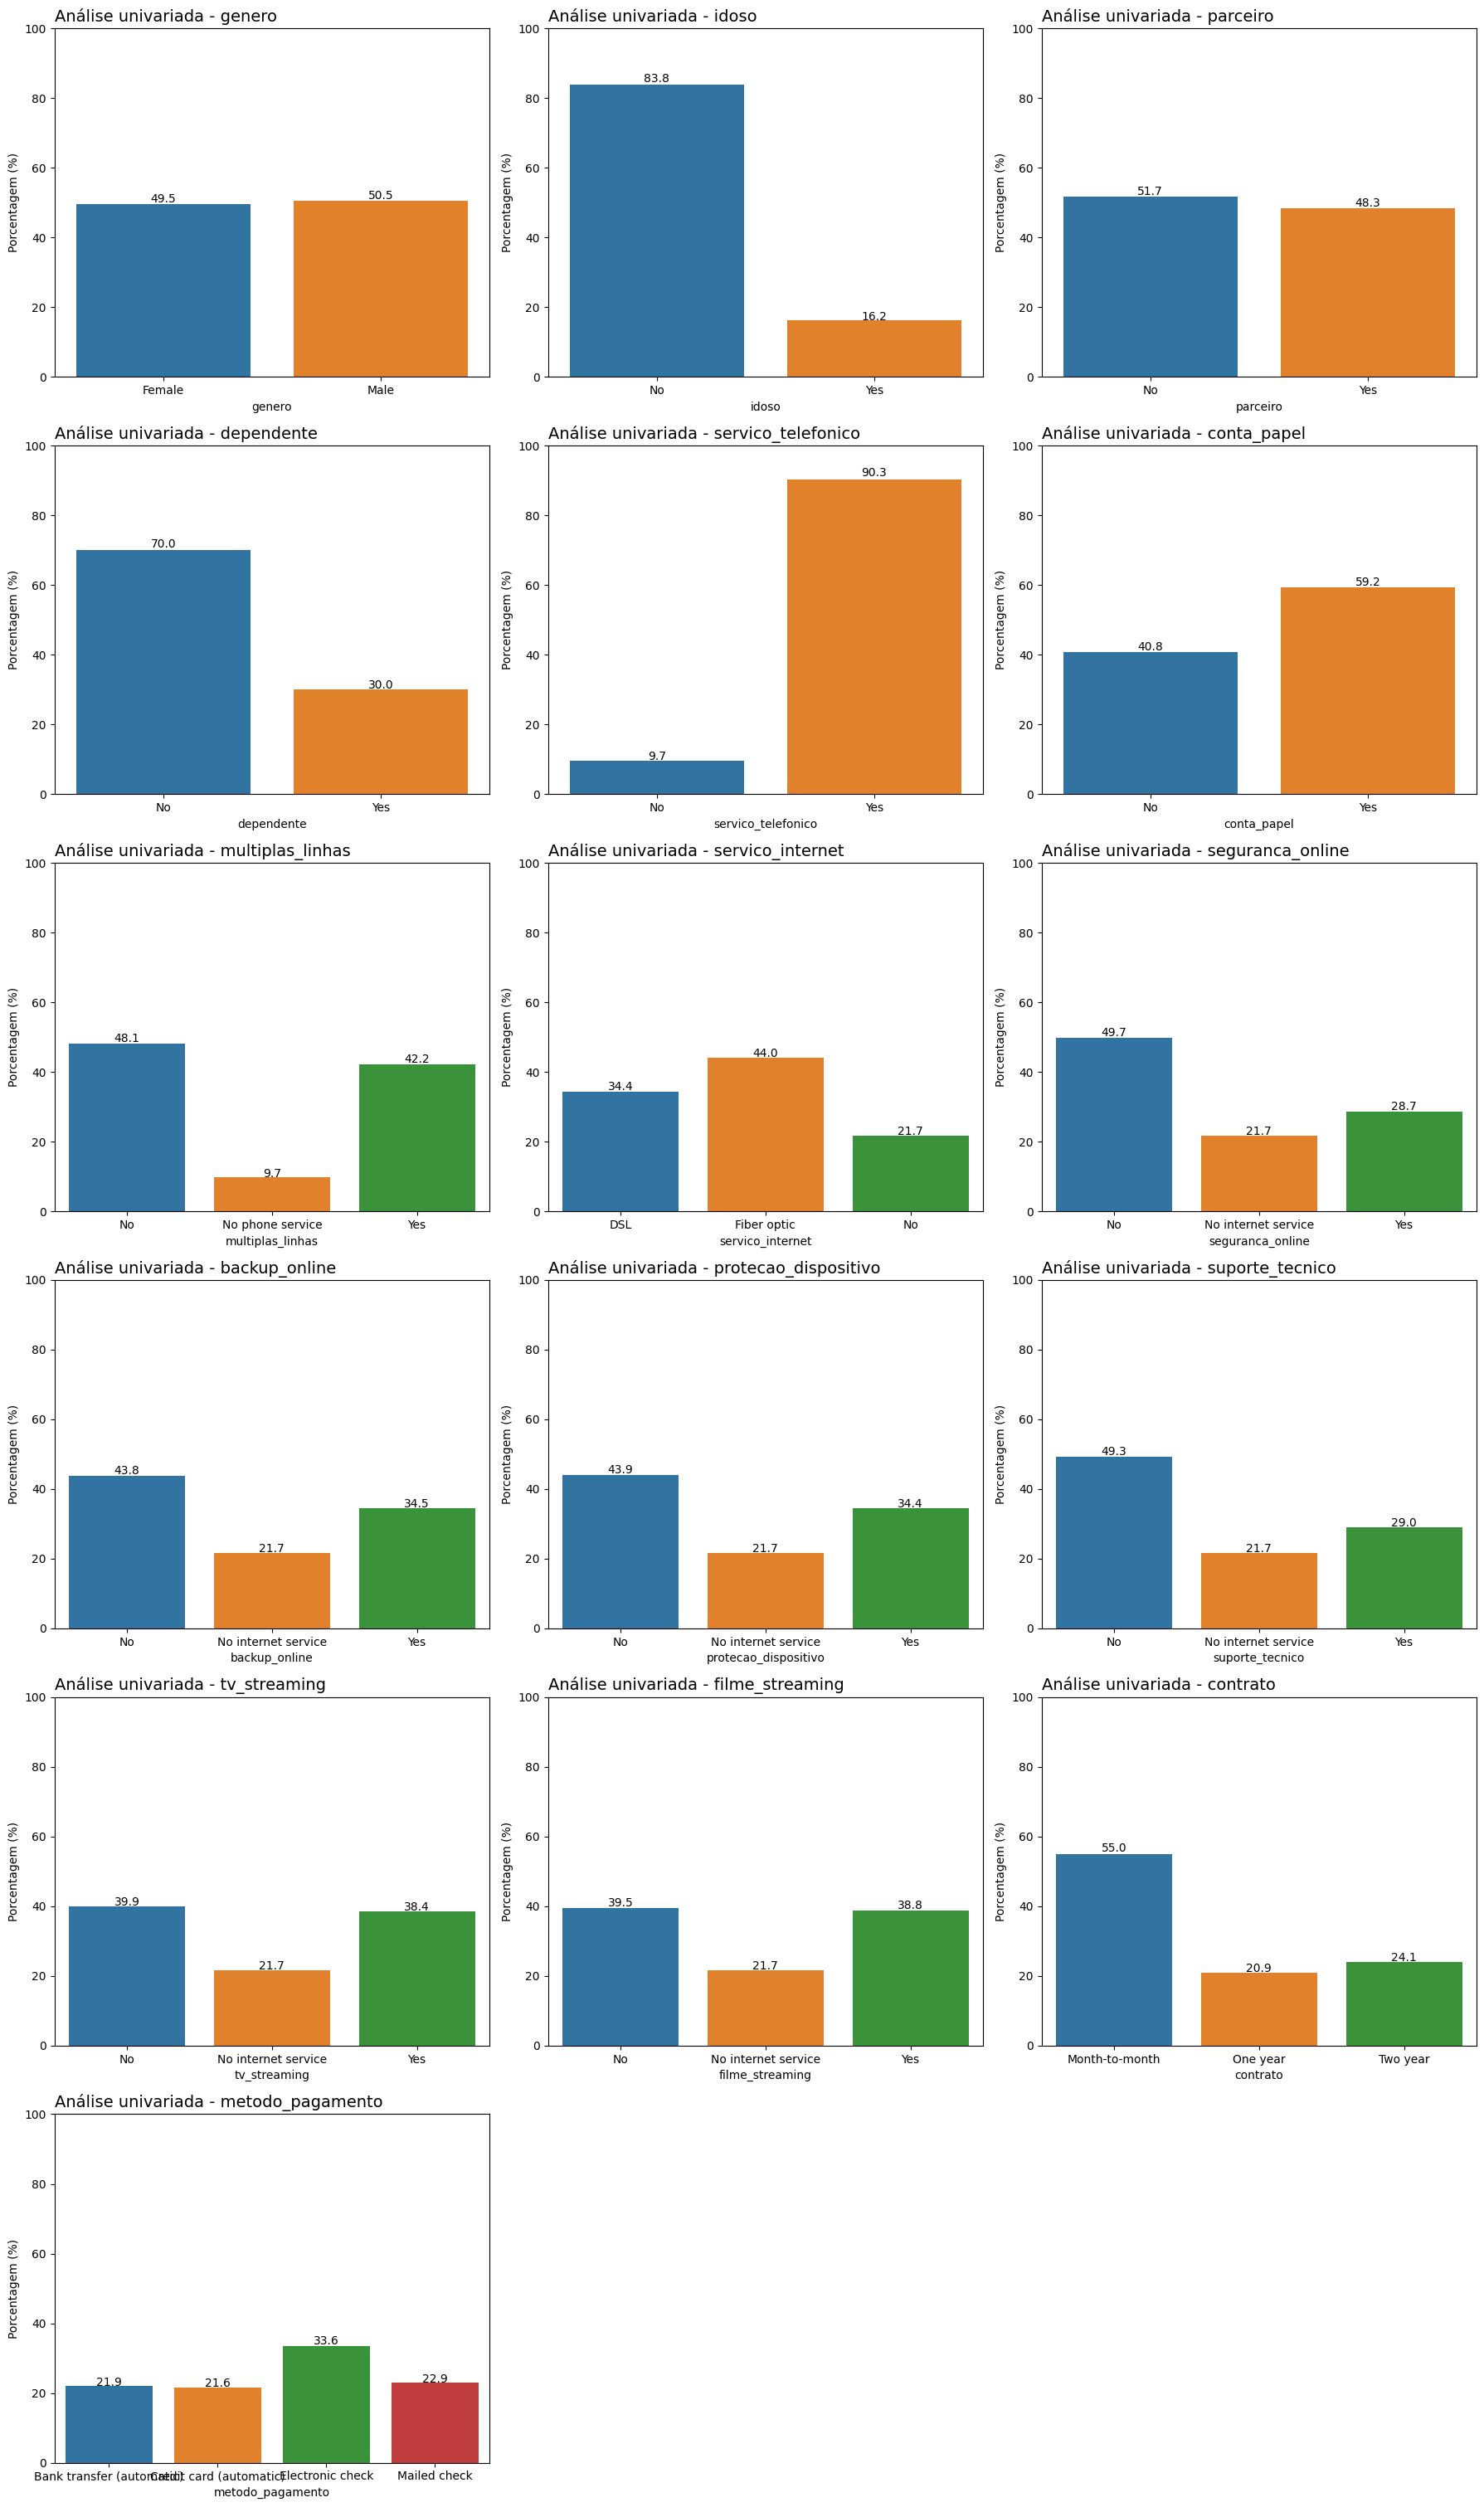

In [140]:
# distriuições das colunas dicotómicas
plt.figure(figsize = (18, 50))
for position, column in enumerate(categorical_columns):
    plt.subplot(10, 3, position + 1)
    plot_bar(data_04, column)

plt.tight_layout()

Inferências das colunas categóricas:
- **genero:** a base possui praticamente a mesma proporção de homens e mulheres;
- **idoso:** a maior parte de base é composta por jovens;
- **parceiro:** a base possui praticamente a mesma proporção de pessoas com parceiro e sem parceiro;
- **dependente:** a base possui cerca de 1/3 de possoas sem dependentes;
- **servico_telefonico:** a maior parte da base possui serviço telefonico;
- **conta_papel:** um pouco mais da metade da base recebe conta por papel;
- **multiplas_linhas:** dos usuários que possuem serviço telefônico, cerca de metade deles possui multiplas linhas e a outra metade não possui;
- **servico_internet:** dos usuarios que possuem serviço de internet, um pouco mais da metade possui internet de fibra ótica;
- **seguranca_online:** dos usuarios que possuem serviço de internet, a maioria deles não possui nenhum serviço de segurança online;
- **backup_online:** dos usuarios que possuem serviço de internet, um pouco mais da metade não possui serviço de backup online;
- **protecao_dispositivo:** dos usuarios que possuem serviço de internet, um pouco mais da metade não possui serviço de proteção do dispositivo;
- **suporte_tecnico:** dos usuarios que possuem serviço de internet, a maioria deles não possui serviço de suporte técnico;
- **tv_streaming:** dos usuarios que possuem serviço de internet, cerca de metade deles possui stream de tv e a outra metade não possui;
- **filme_streaming:** dos usuarios que possuem serviço de internet, cerca de metade deles possui stream de filme e a outra metade não possui;
- **contrato:** a maioria dos usuários possui um contrato mês a mês, com o outros dois tipos de contrato com quase a mesma proporção;
- **tv_streaming:** a maioria dos usuários opta pelo método de pagamento de cheque eletrônico, com os outros três tipos de métodos de pagamento com quase a mesma proporção.

### 4.1.3. Análise das variáveis numéricas

Segue abaixo a analise das variáveis das colunas que contém valores numéricos.

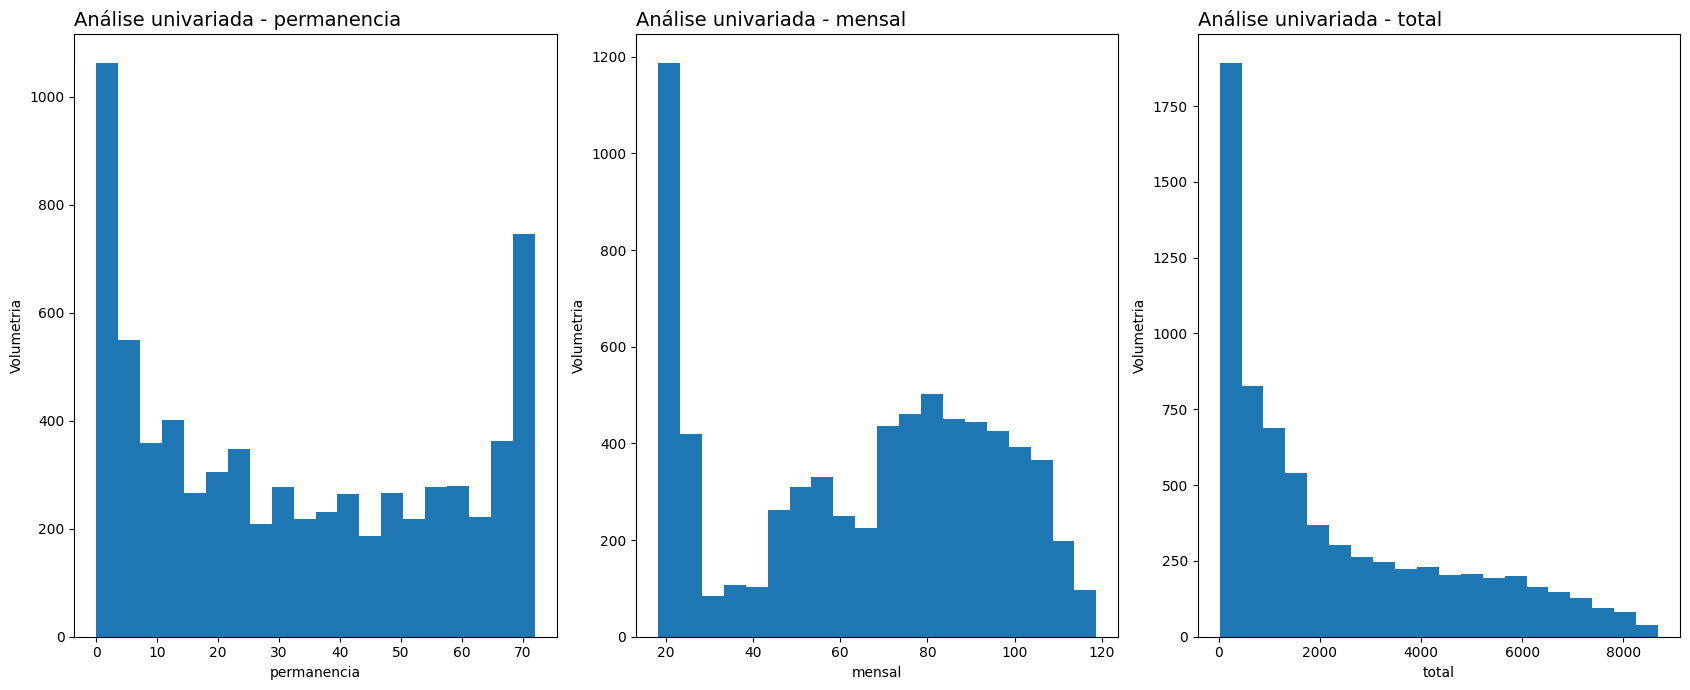

In [141]:
# distriuições das colunas numericas
plt.figure(figsize = (17, 7))
for position, column in enumerate(numerical_columns):
    plt.subplot(1, 3, position + 1)
    plot_hist(data_04, column)

plt.tight_layout()
plt.show()

Para melhorar e ajudar na análise acima, serão geradas algumas medidas estatísticas das colunas numéricas.

In [142]:
# medidas estatísticas das colunas númericas
data_04[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
permanencia,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
mensal,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
total,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80


Inferências das colunas numéricas:
- **permanencia:** a base possui praticamente a mesma proporção de permanencia para permanencias médias e possui permanencia baixas e altas em maiores níveis.;
- **mensal:** a distribuição dos valores mensais podem se encaixar em uma distribuição normal***;
- **total:** a distribuição dos valores da variável total possui um formato de uma distribuição qui quadrado.

## 4.2. Análise Bivariada

### 4.2.1. Variáveis Dicotómicas

##### Teste Estatístico (dicotómicas)

- H0: Não há diferença entre os grupos
- H1: Há diferença entre os grupos

* Se o p_value for maior que 5%, não rejeitar a hipótese nula
* Se o p_value for menor que 5%, rejeitar a hipótese nula

Será aplicado um teste estatístico para verificar se há diferença entre os grupos de comparação ou não.

In [143]:
# aplicando o teste estatístico de comparação entre a coluna que se quer avaliar e a coluna 'churn'
# Chi-square of Goodness of fit test
p_values_churn_yes = []
p_values_churn_no = []
results_churn_yes = []
results_churn_no = []
columns = dichotomic_columns
significance = 0.05

for column in columns:
    odds, p_value = chisquare(pd.crosstab(data_04[column], data_04.churn))

    p_values_churn_yes.append(p_value[1].round(4))
    p_values_churn_no.append(p_value[0].round(4))

    if p_value[1] > significance:
        result_yes = 'Não rejeita H0, não há diferença entre os grupos'
    else:
        result_yes = 'Rejeita H0, há diferença entre os grupos'

    if p_value[0] > significance:
        result_no = 'Não rejeita H0, não há diferença entre os grupos'
    else:
        result_no = 'Rejeita H0, há diferença entre os grupos'

    results_churn_yes.append(result_yes)
    results_churn_no.append(result_no)

pd.DataFrame({'p_value (churn = Yes)': p_values_churn_yes,
              'result (churn = Yes)': results_churn_yes,
              'p_value (churn = No)': p_values_churn_no,
              'result (churn = No)': results_churn_no}, 
              index = columns)

,p_value (churn = Yes),result (churn = Yes),p_value (churn = No),result (churn = No)
genero,0.8351,"Não rejeita H0, não há diferença entre os grupos",0.2907,"Não rejeita H0, não há diferença entre os grupos"
idoso,0.0000,"Rejeita H0, há diferença entre os grupos",0.0000,"Rejeita H0, há diferença entre os grupos"
parceiro,0.0000,"Rejeita H0, há diferença entre os grupos",0.0000,"Rejeita H0, há diferença entre os grupos"
dependente,0.0000,"Rejeita H0, há diferença entre os grupos",0.0000,"Rejeita H0, há diferença entre os grupos"
servico_telefonico,0.0000,"Rejeita H0, há diferença entre os grupos",0.0000,"Rejeita H0, há diferença entre os grupos"
conta_papel,0.0000,"Rejeita H0, há diferença entre os grupos",0.0000,"Rejeita H0, há diferença entre os grupos"


##### Churn vs Gênero

Embora o teste estatístico já tenha mostrado que não há diferença entre ser do sexo masculino ou feminino para ser 'churn', tanto 'Yes' quanto 'No', irei fazer essa análise gráfica.

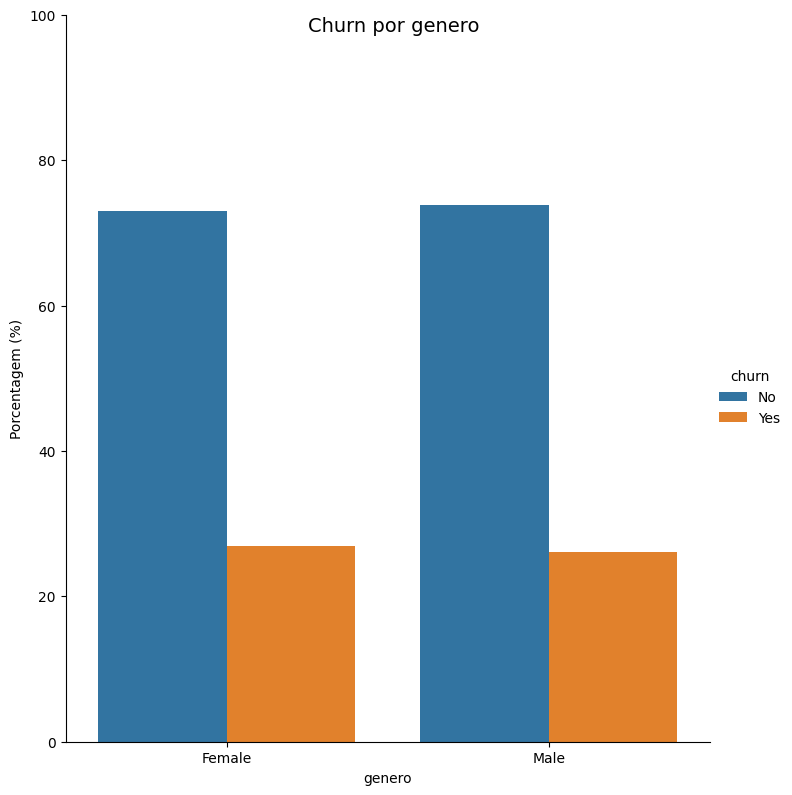

In [144]:
# comparação da proporção de 'churn' por 'genero'
plot_catplot(data_04, 'genero')

A partir do gráfico acima pode-se notar que a variável 'genero' não tem impacto na variável 'churn', uma vez que elas apresentam basicamente a mesma proporção de 'churn' entre os sexos feminino e masculino.

##### Churn vs Idoso

Pelo teste estatístico tem-se que há diferença estatística na proporção de churn por ser idoso ou não.

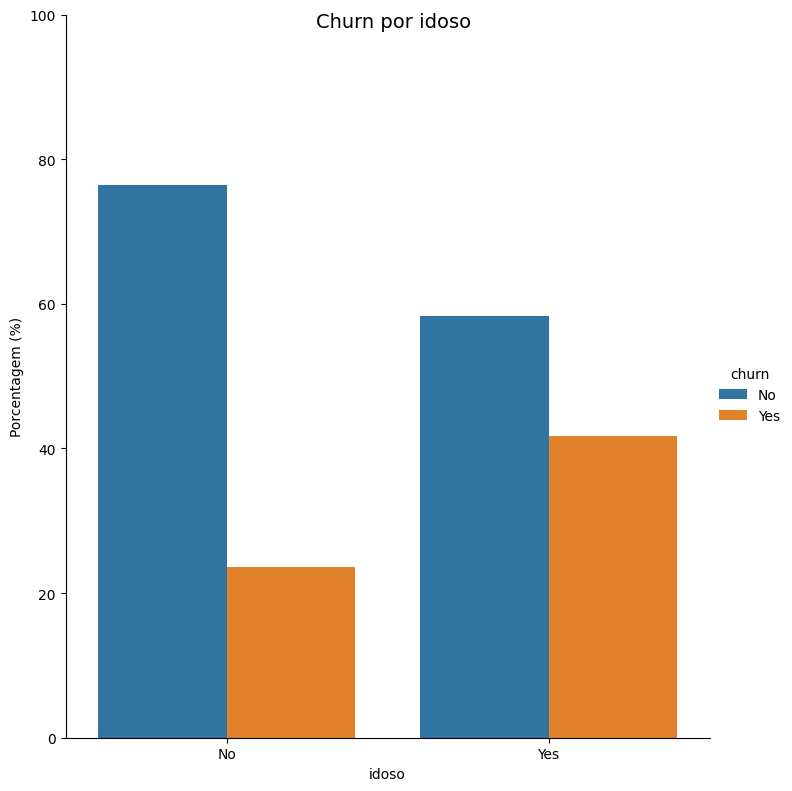

In [145]:
# comparação da proporção de 'churn' por 'idoso'
plot_catplot(data_04, 'idoso')

É possível observar que cerca de 40% das pessoas que são idosas são churn contra um pouco mais de 20% das pessoas que são jovens. Então, o fato da pessoa ser idosa indica que ela possui maiores chances de ser churn.

##### Churn vs Parceiro

Pelo teste estatístico tem-se que há diferença estatística na proporção de churn por ter parceiro ou não.

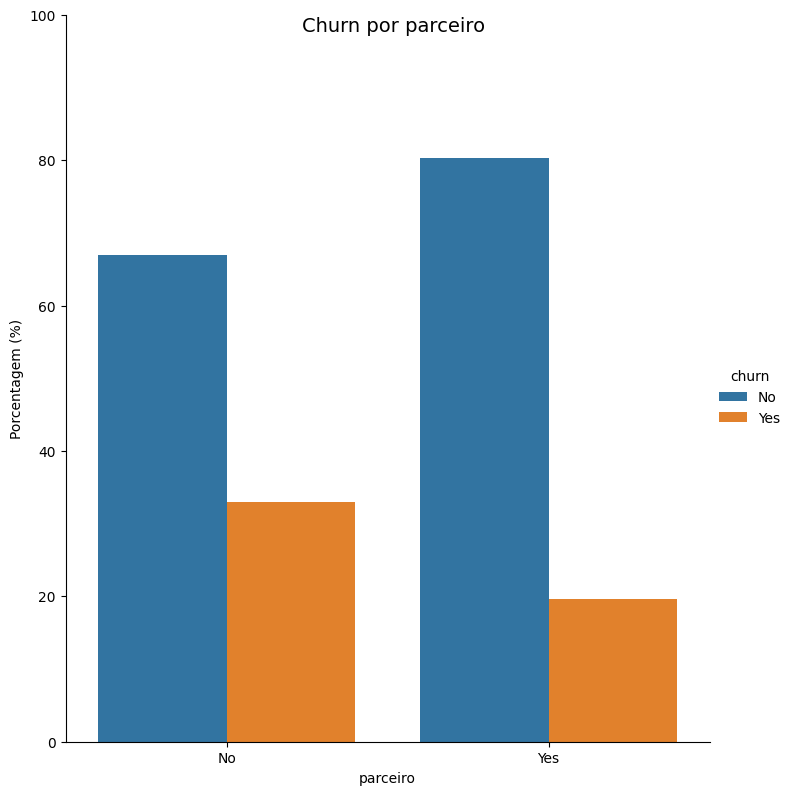

In [146]:
# comparação da proporção de 'churn' por 'parceiro'
plot_catplot(data_04, 'parceiro')

##### Churn vs Dependente

Pelo teste estatístico tem-se que há diferença estatística na proporção de churn por ter dependente ou não.

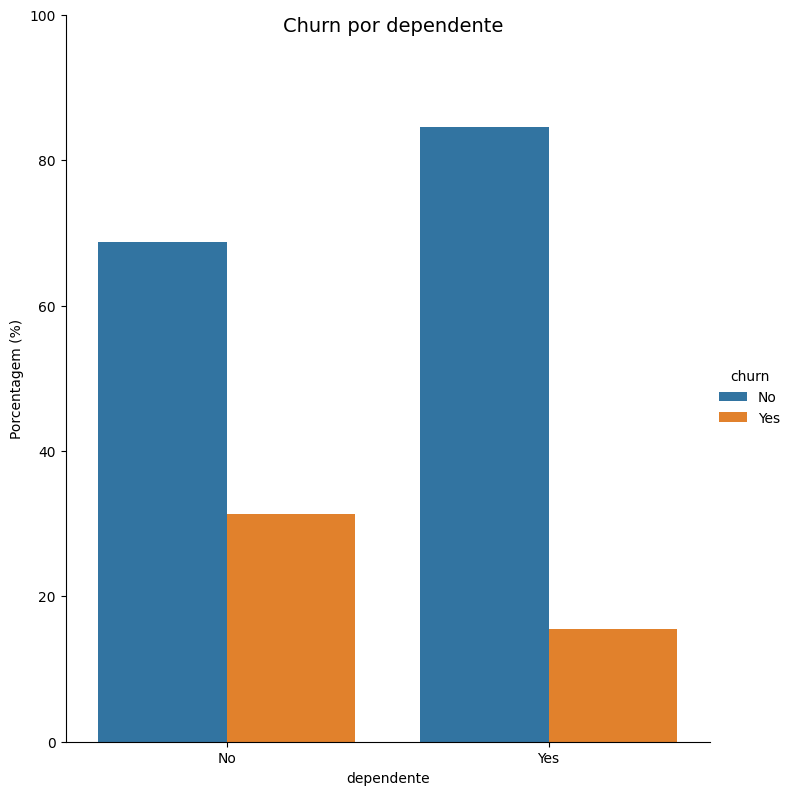

In [147]:
# comparação da proporção de 'churn' por 'dependente'
plot_catplot(data_04, 'dependente')

##### Churn vs Serviço Telefônico

Pelo teste estatístico tem-se que há diferença estatística na proporção de churn por ter servico_telefonico ou não.

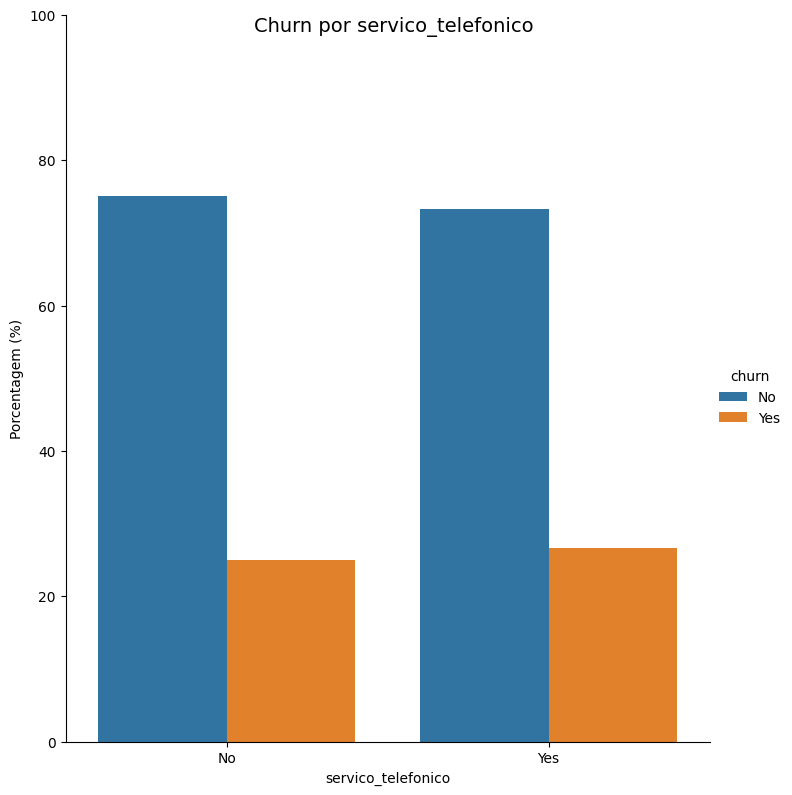

In [148]:
# comparação da proporção de 'churn' por 'servico_telefonico'
plot_catplot(data_04, 'servico_telefonico')

##### Churn vs Conta papel

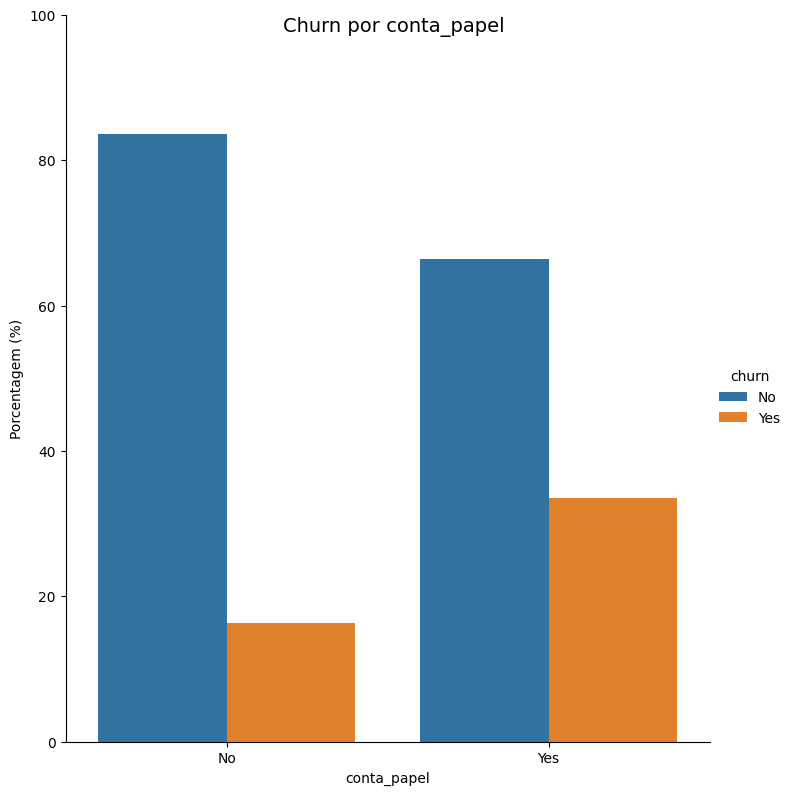

In [149]:
# comparação da proporção de 'churn' por 'servico_telefonico'
plot_catplot(data_04, 'conta_papel')

#### 4.2.2. Variáveis Policotómicas

##### Teste Estatístico (policotómicas)

- H0: Os grupos são independentes
- H1: Os grupos são dependentes

* Se o p_value for maior que 5%, não rejeitar a hipótese nula
* Se o p_value for menor que 5%, rejeitar a hipótese nula

In [150]:
# aplicando o teste estatístico de comparação entre a coluna que se quer avaliar e a coluna 'churn' 
# Chi-square test for independence
p_values = []
results = []
significance = 0.05
columns = polichotomic_columns

for column in columns:
    chi2_statistic, p_value, dof = chi2_contingency(pd.crosstab(data_04[column], data_04.churn))[0:3]

    p_values.append(p_value.round(4))

    if p_value > significance:
        result = 'Independentes (Não rejeitar H0)'
    else:
        result = 'Dependentes (Rejeitar H0)' #there is no effect of group in choosing the equipment to use

    results.append(result)

pd.DataFrame({'p_value': p_values,
              'result': results},
              index = columns)

,p_value,result
multiplas_linhas,0.0035,Dependentes (Rejeitar H0)
servico_internet,0.0000,Dependentes (Rejeitar H0)
seguranca_online,0.0000,Dependentes (Rejeitar H0)
backup_online,0.0000,Dependentes (Rejeitar H0)
protecao_dispositivo,0.0000,Dependentes (Rejeitar H0)
suporte_tecnico,0.0000,Dependentes (Rejeitar H0)
tv_streaming,0.0000,Dependentes (Rejeitar H0)
filme_streaming,0.0000,Dependentes (Rejeitar H0)
contrato,0.0000,Dependentes (Rejeitar H0)
metodo_pagamento,0.0000,Dependentes (Rejeitar H0)


##### Churn vs Multiplas Linhas

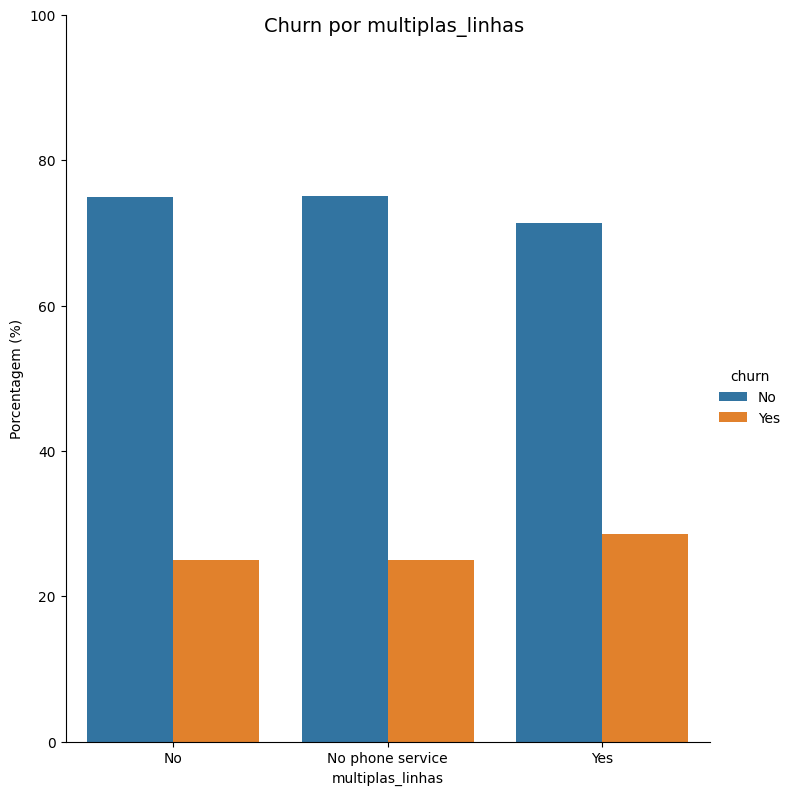

In [151]:
# comparação da proporção de 'churn' por 'multiplas_linhas'
plot_catplot(data_04, 'multiplas_linhas')

##### Churn vs Serviço Internet

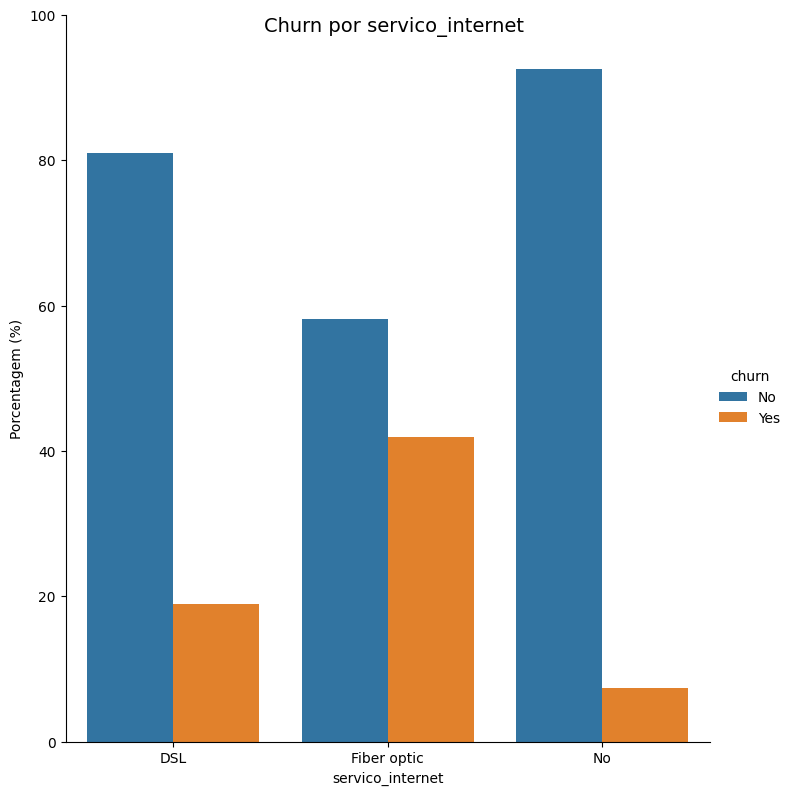

In [152]:
# comparação da proporção de 'churn' por 'servico_internet'
plot_catplot(data_04, 'servico_internet')

##### Churn vs Serviços Online

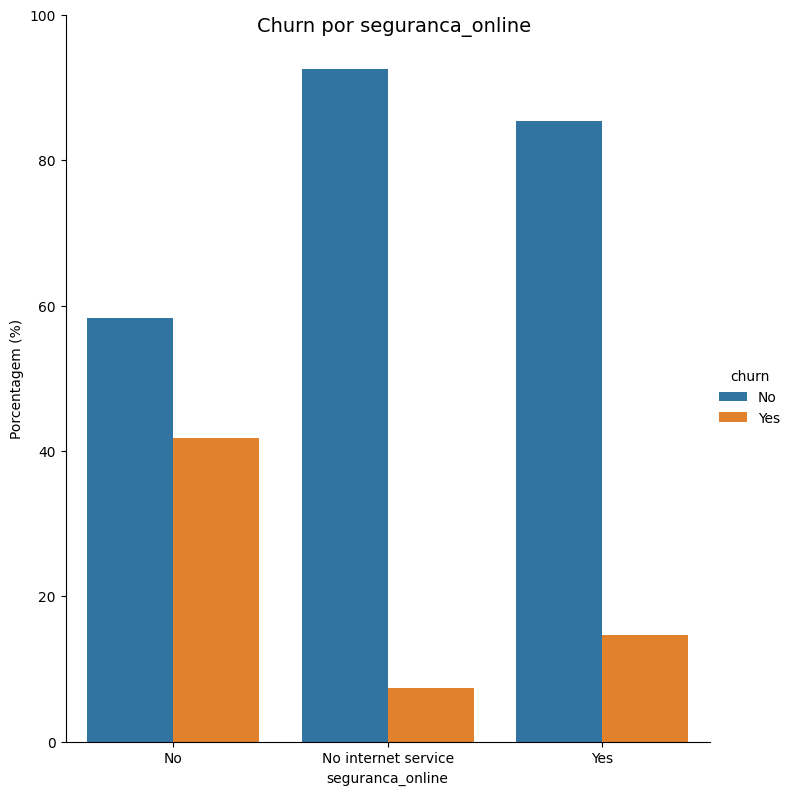

In [153]:
# comparação da proporção de 'churn' por 'seguranca_online'
plot_catplot(data_04, 'seguranca_online')

##### Churn vs Backup Online

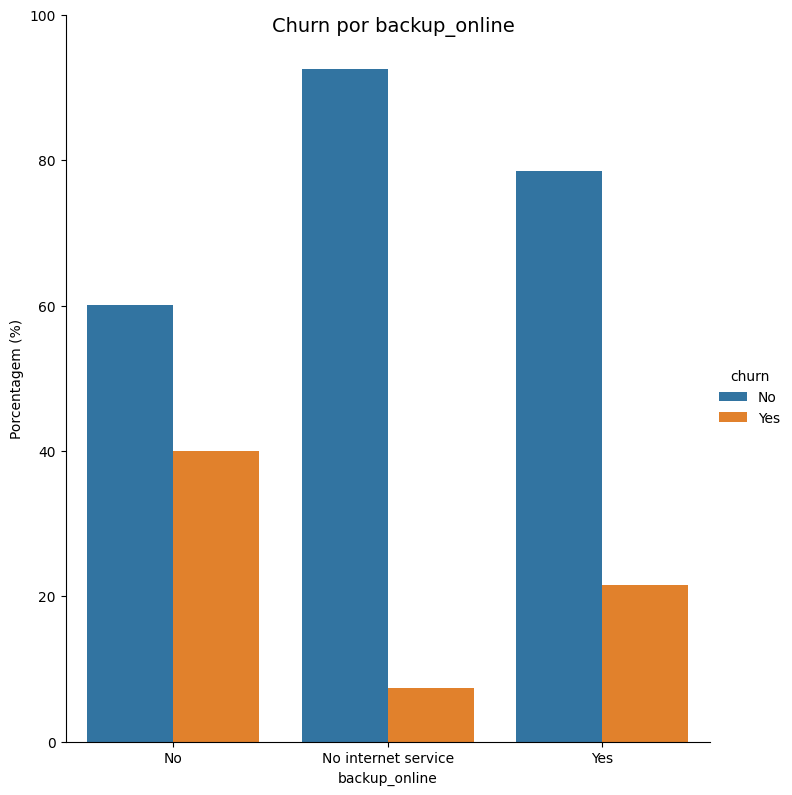

In [154]:
# comparação da proporção de 'churn' por 'backup_online'
plot_catplot(data_04, 'backup_online')

##### Churn vs Proteção do Dispositivo

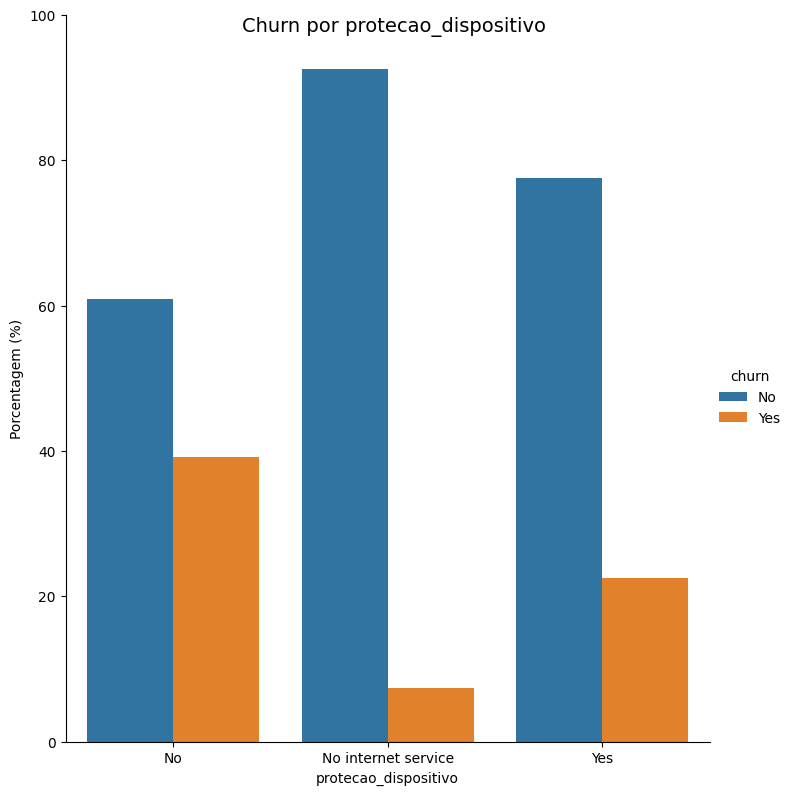

In [155]:
# comparação da proporção de 'churn' por 'protecao_dispositivo'
plot_catplot(data_04, 'protecao_dispositivo')

##### Churn vs Suporte Técnico

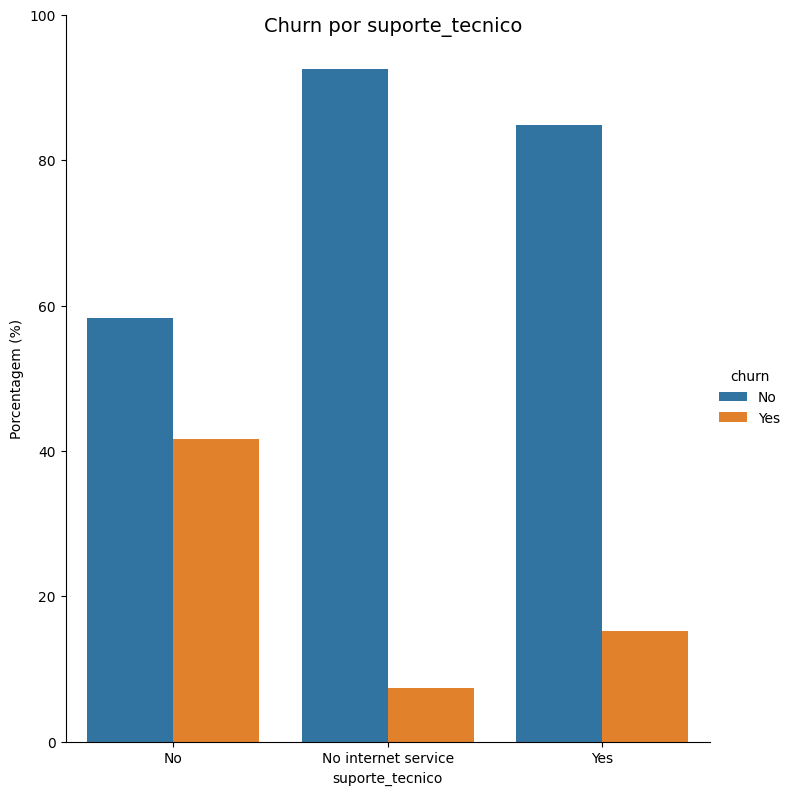

In [156]:
# comparação da proporção de 'churn' por 'suporte_tecnico'
plot_catplot(data_04, 'suporte_tecnico')

##### Churn vs TV Streaming

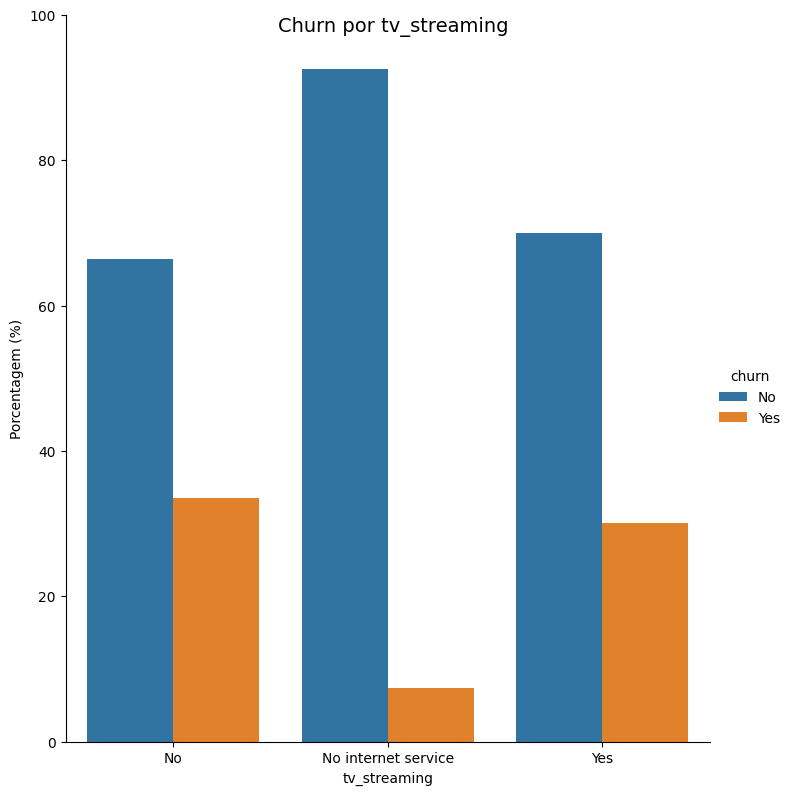

In [157]:
# comparação da proporção de 'churn' por 'tv_streaming'
plot_catplot(data_04, 'tv_streaming')

##### Churn vs Filme Streaming

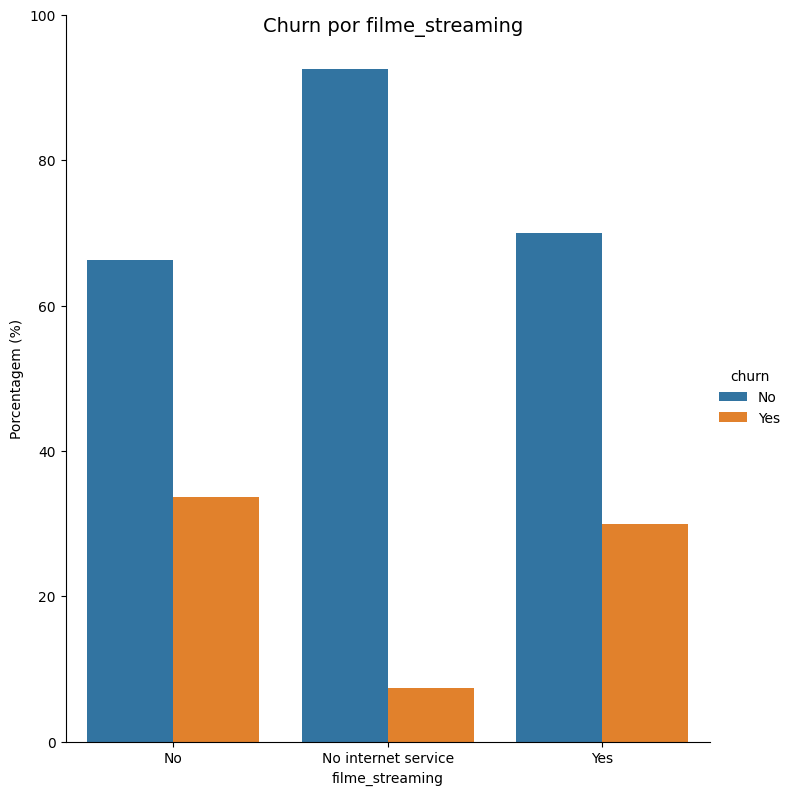

In [158]:
# comparação da proporção de 'churn' por 'filme_streaming'
plot_catplot(data_04, 'filme_streaming')

##### Churn vs Contrato

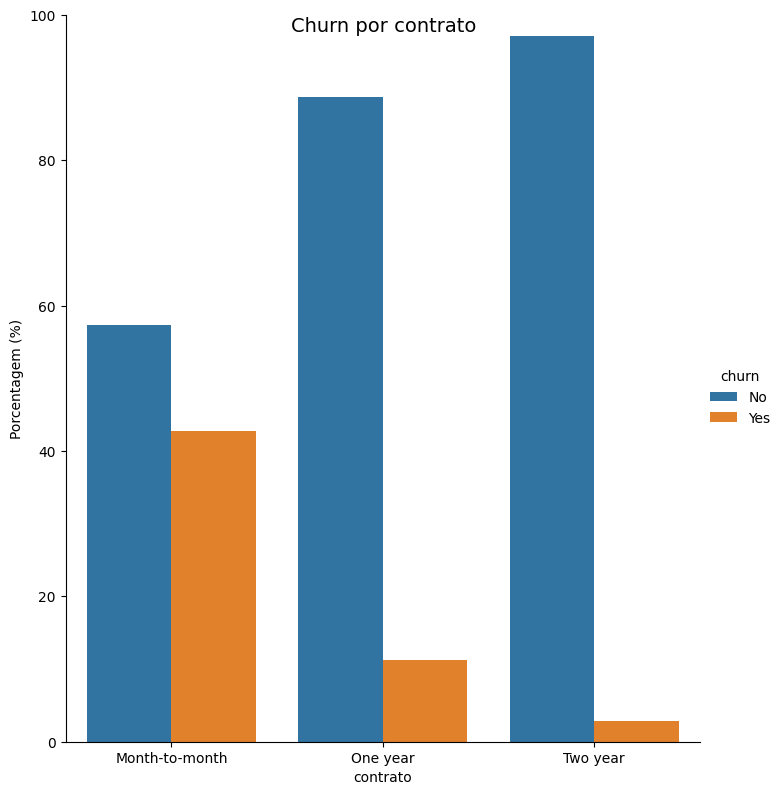

In [159]:
# comparação da proporção de 'churn' por 'contrato'
plot_catplot(data_04, 'contrato')

##### Churn vs Método pagamento

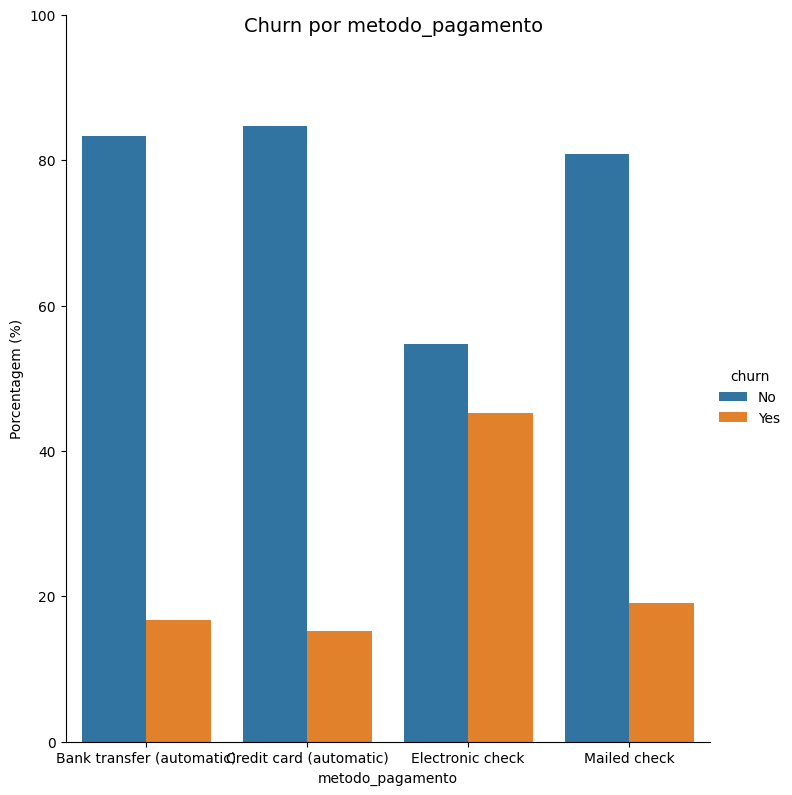

In [160]:
# comparação da proporção de 'churn' por 'metodo_pagamento'
plot_catplot(data_04, 'metodo_pagamento')

#### 4.2.3. Variáveis Numéricas

##### Teste Estatístico (numéricas)

- H0: As médias são iguais
- H1: Há diferença entre as médias

* Se o p_value for maior que 5%, não rejeitar a hipótese nula
* Se o p_value for menor que 5%, rejeitar a hipótese nula

In [161]:
# 
columns = numerical_columns
significance = 0.05
p_values = []
results = []

for column in columns:
    statistic, p_value = mannwhitneyu(data_04[data_04.churn == 'Yes'][column], data_04[data_04.churn == 'No'][column])
    
    p_values.append(p_value.round(4))

    if p_value <= significance:
        result = 'Rejeitar H0'
    else:
        result = 'Não rejeitar H0'

    results.append(result)


pd.DataFrame({
    'p_value': p_values,
    'result': results
}, index = columns)

,p_value,result
permanencia,0.0,Rejeitar H0
mensal,0.0,Rejeitar H0
total,0.0,Rejeitar H0


##### Churn vs Permanencia

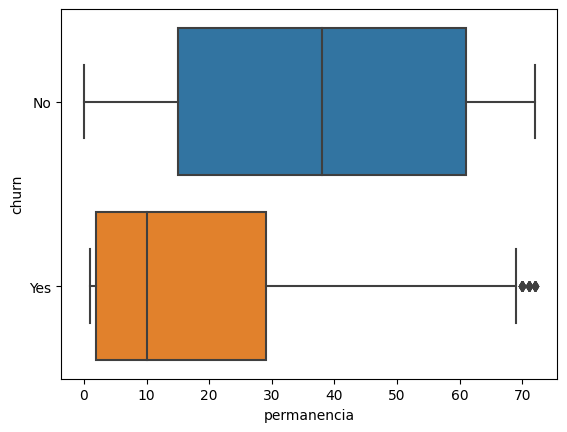

In [162]:
sns.boxplot(data = data_04[numerical_columns + target_column], x = 'permanencia', y = 'churn')

plt.show()

##### Churn vs Mensal

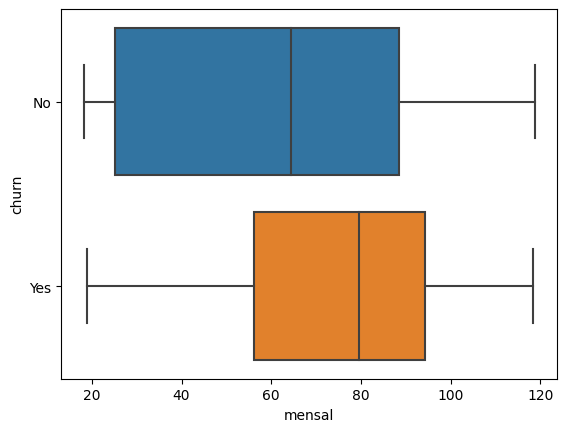

In [163]:
sns.boxplot(data = data_04[numerical_columns + target_column], x = 'mensal', y = 'churn')

plt.show()

##### Churn vs Total

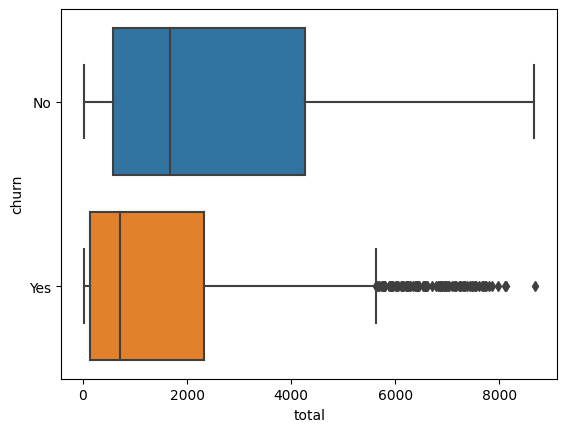

In [164]:
sns.boxplot(data = data_04[numerical_columns + target_column], x = 'total', y = 'churn')

plt.show()

### 4.2.4. Hipóteses

H1: Pessoas idosas tendem a ter uma taxa de churn mais alta do que pessoas jovens:
- R: Falsa, a taxa de churn é maior para pessoas jovens do que para pessoas idosas.

H2: Pessoas que possuem parceiros tendem a ter uma taxa de churn mais alta do que pessoas sem parceiros:
- R: Verdade, pessoas que possuem parceiros tem uma taxa de churn maior do que pessoas que não possuem parceiros.

H3: Pessoas que possuem dependentes tendem a ter uma taxa de churn mais alta do que pessoas que não possuem dependentes:
- R: Verdade, pessoas que possuem dependentes tem uma taxa de churn maior do que pessoas que não possuem dependentes.


H4: Pessoas com permanencia menor, tendem a ter uma taxa de churn mais alta do que pessoas com permanencia maior:
- R: Verdade, pessoas que possuem permanencia mais baixa tem uma taxa de churn maior do que pessoas que possuem permanencia mais alta.


H5: Pessoas que possuem multiplas linhas tem uma taxa de churn maior do que as pessoas que não possuem multiplas linhas:
- R: Falso, a taxa de churn é igual tanto para pessoas que possuem multiplas linhas quanto para as pessoas que não possuem.


## 4.3. Análise Multivariada

Irei plotar um mapa de calor para melhor visualizar a correlação entre as variáveis categóricas.

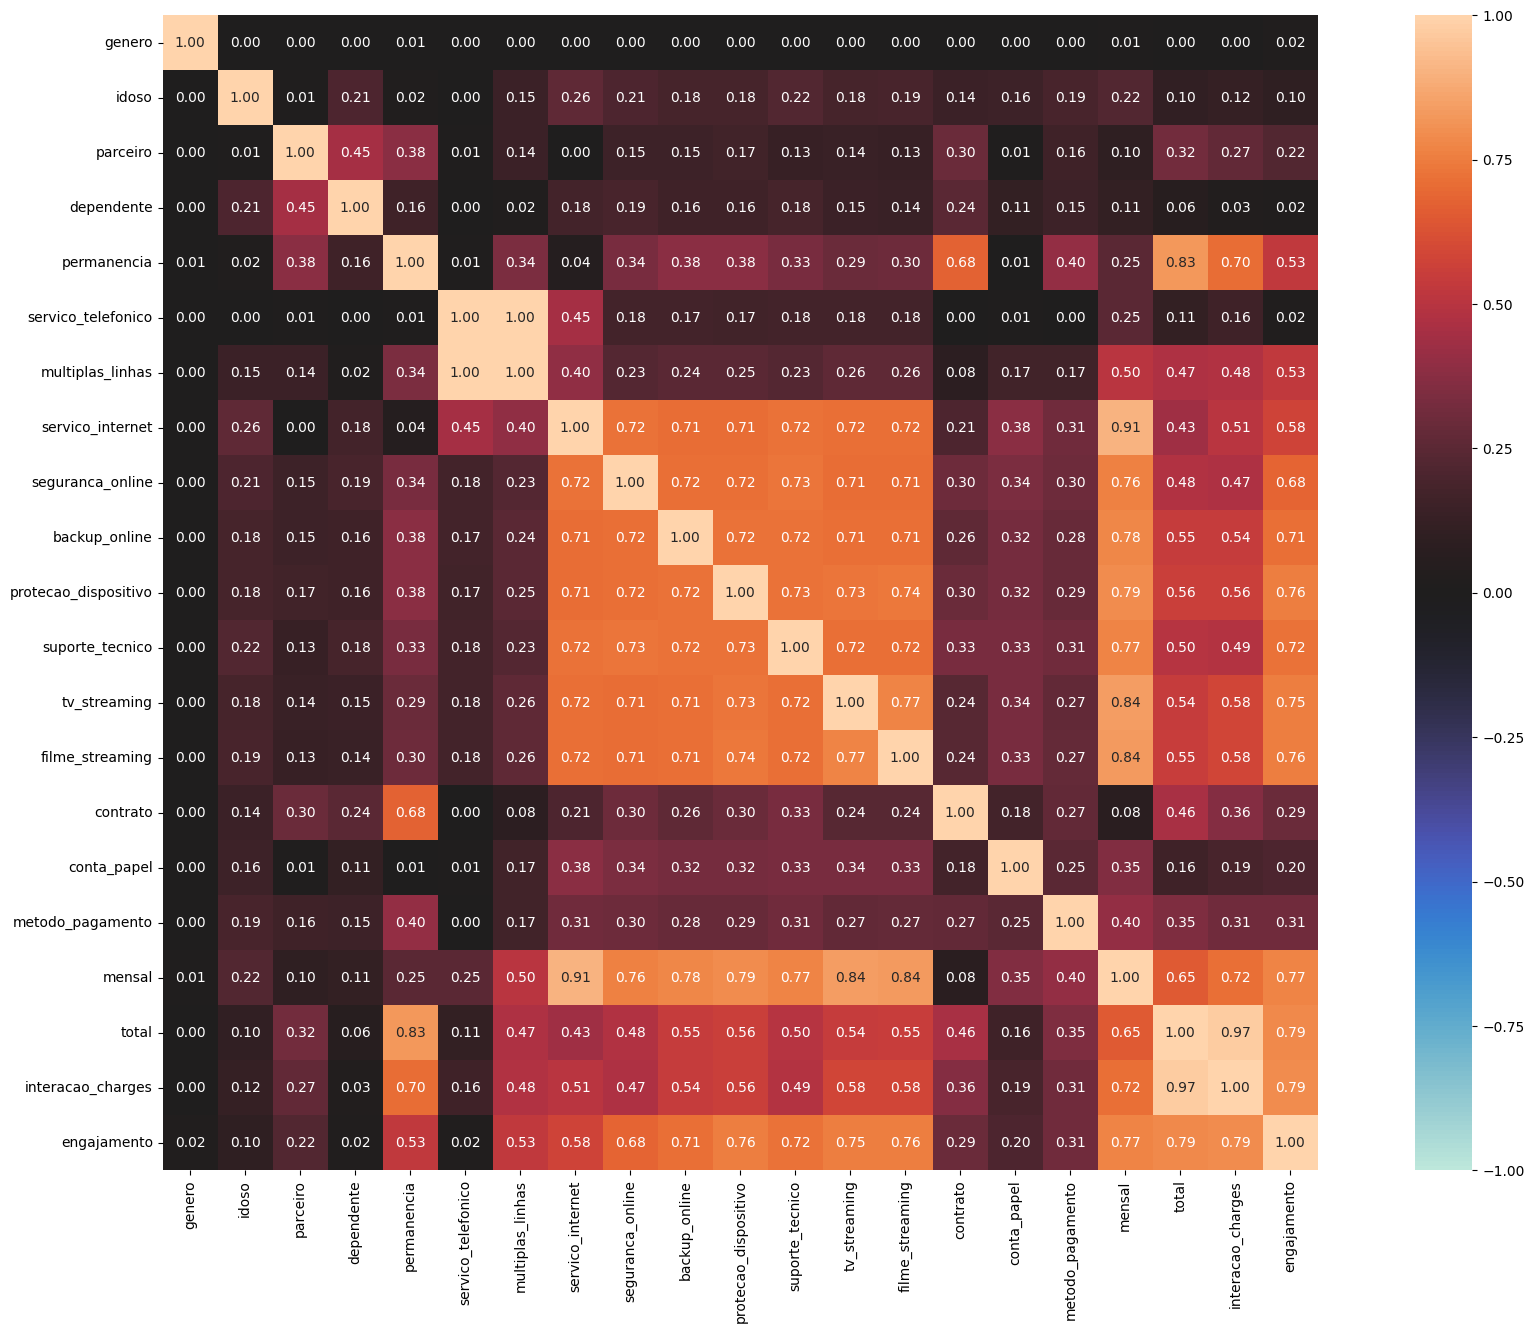

In [165]:
# plotando o mapa de calor
a = nominal.associations(data_04.iloc[:, 1:], figsize = (25, 15));

É possível notar que existem variáveis que são altamente correlacionadas entre si, isso terá que ser lavado em conta na hora da seleção das variáveis para a aplicação no modelo.

# 5. Preparação dos Dados

In [166]:
# backup dos dados
data_05 = data_04.copy()

# verificando as primeiras linhas
data_05.head()

,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total,interacao_charges,engajamento
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,38920.480,3
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,32489.760,2
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,20754.815,1
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,121309.300,4
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,22434.860,2


## 5.1. Normalização

A coluna 'total' possui uma distribuição qui quadrado. Será necessário fazer a normalização dessa coluna.

In [167]:
# Aplicar a transformação logarítmica
data_05['total'] = np.log(np.array(data_05['total']))

## 5.2. Padronização

In [168]:
# Normalização Min-Max nos dados transformados
scaler = MinMaxScaler()
# scaler = StandardScaler()

data_05['total'] = scaler.fit_transform(np.array(data_05['total']).reshape(-1, 1))
data_05['mensal'] = scaler.fit_transform(np.array(data_05['mensal']).reshape(-1, 1))
data_05['interacao_charges'] = scaler.fit_transform(np.array(data_05['mensal']).reshape(-1, 1))
data_05['permanencia'] = scaler.fit_transform(np.array(data_05['permanencia']).reshape(-1, 1))
data_05['engajamento'] = scaler.fit_transform(np.array(data_05['permanencia']).reshape(-1, 1))

## 5.3. Transformação

### 5.3.1. Encoding

Todas as variáveis dicotomicas, irei fazer label encoding.

In [169]:
# encoding das variáveis dicotomicas
data_05[dichotomic_columns + target_column] = data_05[dichotomic_columns + target_column].replace({
    'No': 0,
    'Yes': 1,
    'Male': 0,
    'Female': 1
})

Todas as variáveis polocotomicas, irei fazer o one hot encoding.

In [170]:
# salvando o resultado em um dataframe
data_05 = pd.get_dummies(data_05, columns=polichotomic_columns) * 1

In [171]:
# verificando
data_05.head()

,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,conta_papel,mensal,total,interacao_charges,engajamento,multiplas_linhas_No,multiplas_linhas_No phone service,multiplas_linhas_Yes,servico_internet_DSL,servico_internet_Fiber optic,servico_internet_No,seguranca_online_No,seguranca_online_No internet service,seguranca_online_Yes,backup_online_No,backup_online_No internet service,backup_online_Yes,protecao_dispositivo_No,protecao_dispositivo_No internet service,protecao_dispositivo_Yes,suporte_tecnico_No,suporte_tecnico_No internet service,suporte_tecnico_Yes,tv_streaming_No,tv_streaming_No internet service,tv_streaming_Yes,filme_streaming_No,filme_streaming_No internet service,filme_streaming_Yes,contrato_Month-to-month,contrato_One year,contrato_Two year,metodo_pagamento_Bank transfer (automatic),metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check
0,0,1,0,1,1,0.125000,1,1,0.471144,0.562604,0.471144,0.125000,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0.125000,1,0,0.414428,0.547985,0.414428,0.125000,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
2,1,0,0,0,0,0.055556,1,1,0.553731,0.440710,0.553731,0.055556,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3,1,0,1,1,0,0.180556,1,1,0.793532,0.682470,0.793532,0.180556,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
4,1,1,1,1,0,0.041667,1,1,0.653234,0.432711,0.653234,0.041667,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1


# 6. Seleção de Variáveis

In [172]:
# backup dos dados
data_06 = data_05.copy()

# verificando as primeiras linhas
data_06.head()

,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,conta_papel,mensal,total,interacao_charges,engajamento,multiplas_linhas_No,multiplas_linhas_No phone service,multiplas_linhas_Yes,servico_internet_DSL,servico_internet_Fiber optic,servico_internet_No,seguranca_online_No,seguranca_online_No internet service,seguranca_online_Yes,backup_online_No,backup_online_No internet service,backup_online_Yes,protecao_dispositivo_No,protecao_dispositivo_No internet service,protecao_dispositivo_Yes,suporte_tecnico_No,suporte_tecnico_No internet service,suporte_tecnico_Yes,tv_streaming_No,tv_streaming_No internet service,tv_streaming_Yes,filme_streaming_No,filme_streaming_No internet service,filme_streaming_Yes,contrato_Month-to-month,contrato_One year,contrato_Two year,metodo_pagamento_Bank transfer (automatic),metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check
0,0,1,0,1,1,0.125000,1,1,0.471144,0.562604,0.471144,0.125000,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0.125000,1,0,0.414428,0.547985,0.414428,0.125000,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
2,1,0,0,0,0,0.055556,1,1,0.553731,0.440710,0.553731,0.055556,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3,1,0,1,1,0,0.180556,1,1,0.793532,0.682470,0.793532,0.180556,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
4,1,1,1,1,0,0.041667,1,1,0.653234,0.432711,0.653234,0.041667,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1


## 6.1. Selecionando as variáveis mais importantes

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (7043, 43)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S

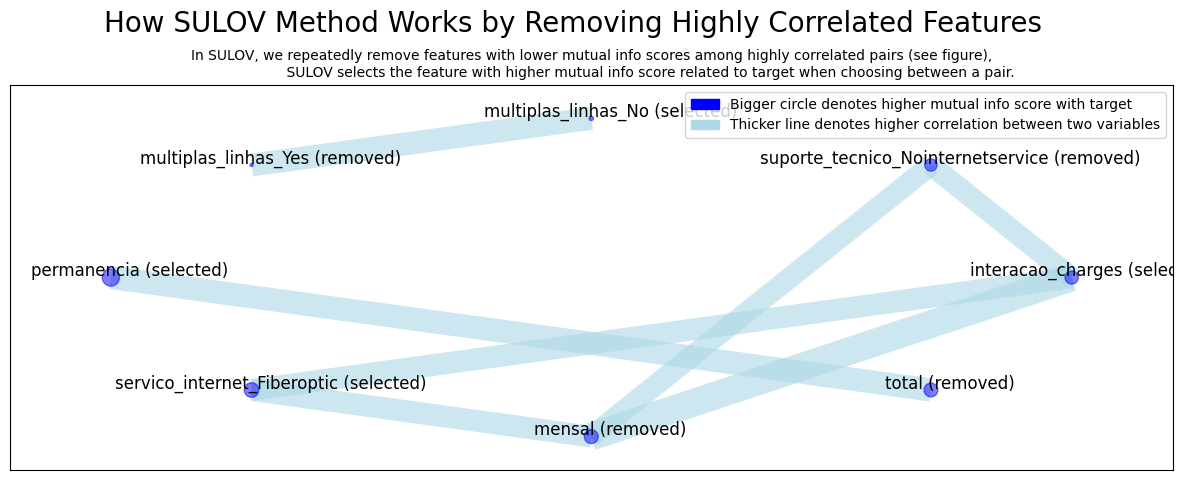

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 38
Finally 38 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 10 features per iteration...
    XGBoost version using 1.7.6 as tree method: hist
    Number of booster rounds = 100
        Selected: ['contrato_Monthtomonth', 'interacao_charges', 'engajamento', 'servico_internet_Fiberoptic', 'seguranca_online_No', 'conta_papel', 'suporte_tecnico_No', 'metodo_pagamento_Electroniccheck', 'genero', 'dependente']
            Time taken for regular XGBoost feature selection = 3 seconds
        Selected: ['contrato_Monthtomonth', 'interacao_charges

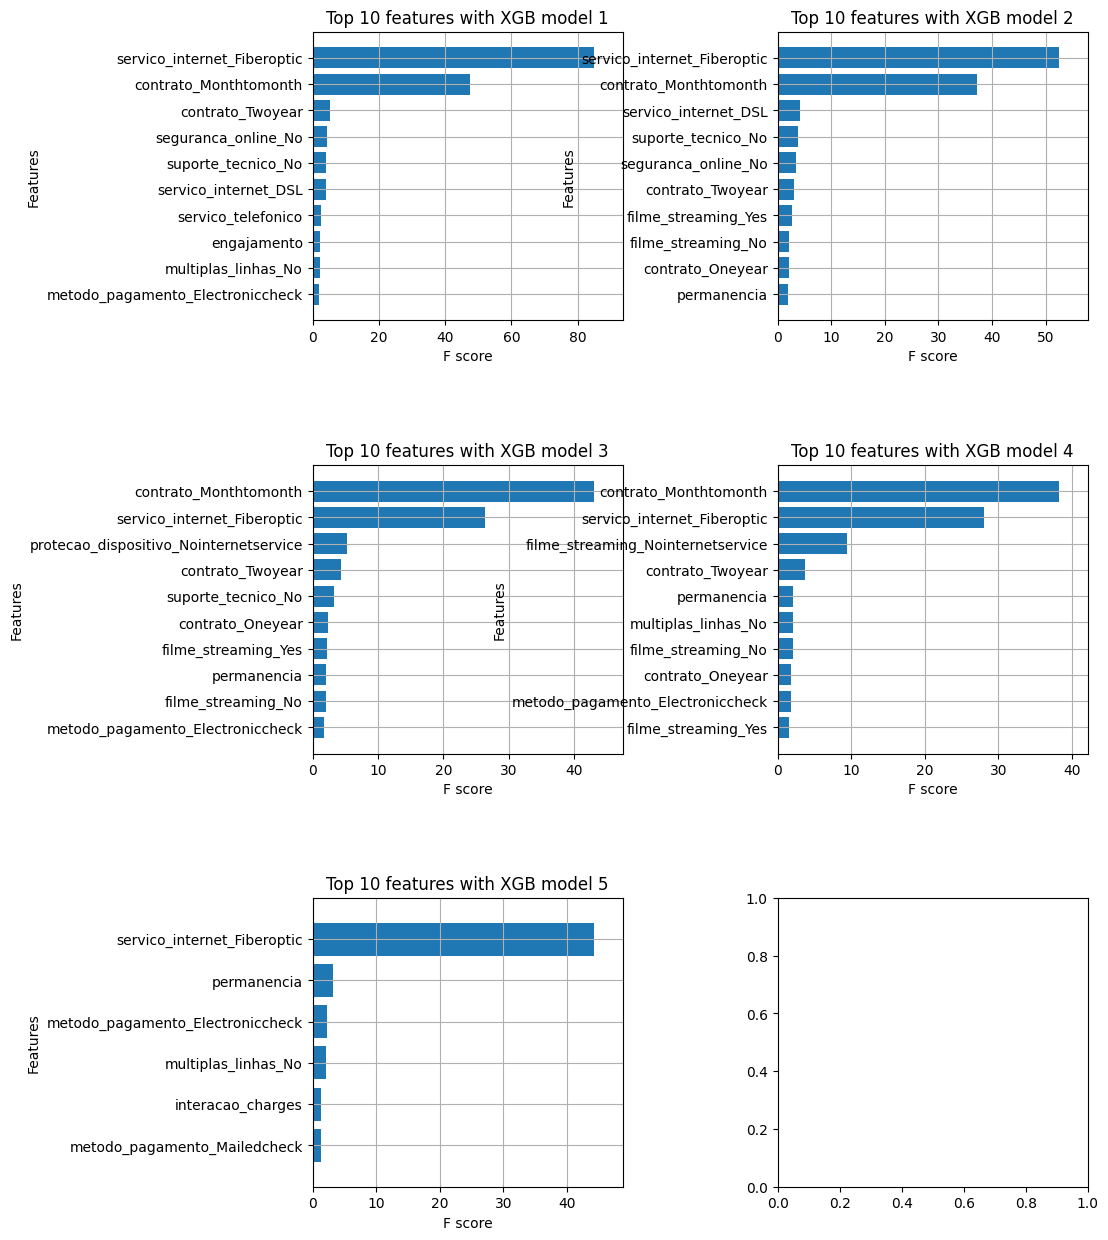

    Completed XGBoost feature selection in 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 19 important features:
['contrato_Monthtomonth', 'interacao_charges', 'engajamento', 'servico_internet_Fiberoptic', 'seguranca_online_No', 'conta_papel', 'suporte_tecnico_No', 'metodo_pagamento_Electroniccheck', 'genero', 'dependente', 'permanencia', 'backup_online_No', 'multiplas_linhas_No', 'contrato_Twoyear', 'contrato_Oneyear', 'metodo_pagamento_Creditcardautomatic', 'filme_streaming_No', 'filme_streaming_Nointernetservice', 'metodo_pagamento_Mailedcheck']
Total Time taken for featurewiz selection = 11 seconds
Output contains a list of 19 important features and a train dataframe


In [173]:
# aplicando uma ferramenta para selecionar as variáveis mais importantes para a modelagem
features, train = featurewiz(
    data_06,
    target='churn',
    corr_limit = 0.7,
    verbose = 2,
    sep = ',',
    header = 0,
    test_data = '',
    feature_engg = '',
    category_encoders = ''
)

## 6.2. Separando os dados em treino e teste

In [174]:
# random state
seed = 42

In [175]:
# separando as variáveis explicativas da variável target
X = data_06[features]
y = data_06.churn.values

In [176]:
# separando em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = seed)

# 7. Modelagem dos Dados

In [177]:
# construção das variáveis explicativas de treino e teste
x_train = X_train.copy()
x_test = X_test.copy()

In [178]:
models = {
    'Dummy Classifier': DummyClassifier(random_state = seed),
    'Logistic Regression': LogisticRegression(random_state = seed), 
    'Random Forest Classifier': RandomForestClassifier(random_state = seed),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state = seed),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state = seed),
    'Support Vector Classifier': SVC(random_state = seed)
}

balances = {
    'Random Under Sampling': RandomUnderSampler(replacement = True, random_state = seed),
    'Tomek Links': TomekLinks(sampling_strategy = 'majority'),
    'Near Miss': NearMiss(),
    'Random Over Sampling': RandomOverSampler(random_state = seed),
    'SMOTE': SMOTE(random_state = seed)
}

In [179]:
accuracy = []
f1 = []
precision = []
recall = []
model_names = []
balance_names = []
roc_auc = []

for balance_name, balance in balances.items():
    for model_name, model in models.items():

        balance = balance
        scale = MinMaxScaler()
        model = model
        
        pipeline = Pipeline([
            ('balanceamento', balance),
            ('normalizacao', scale),
            ('modelo', model)
        ])
        
        cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)
        resultado = cross_validate(pipeline, X, y, cv = cv, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

        accuracy.append(resultado['test_accuracy'].mean().round(2))
        f1.append(resultado['test_f1'].mean().round(2))
        precision.append(resultado['test_precision'].mean().round(2))
        recall.append(resultado['test_recall'].mean().round(2))
        roc_auc.append(resultado['test_roc_auc'].mean().round(2))

        balance_names.append(balance_name)
        model_names.append(model_name)

models_report = pd.DataFrame({
    'model': model_names,
    'balance': balance_names,
    'accuracy': accuracy,
    'f1': f1,
    'precision': precision,
    'recall': recall,
    'roc_auc': roc_auc
})

In [180]:
models_report.sort_values('recall', ascending = False)

,model,balance,accuracy,f1,precision,recall,roc_auc
4,Gradient Boosting Classifier,Random Under Sampling,0.74,0.63,0.51,0.81,0.84
5,Support Vector Classifier,Random Under Sampling,0.74,0.62,0.50,0.80,0.83
19,Logistic Regression,Random Over Sampling,0.74,0.62,0.51,0.79,0.84
1,Logistic Regression,Random Under Sampling,0.74,0.62,0.51,0.79,0.84
29,Support Vector Classifier,SMOTE,0.74,0.61,0.50,0.78,0.82
23,Support Vector Classifier,Random Over Sampling,0.74,0.62,0.51,0.78,0.82
22,Gradient Boosting Classifier,Random Over Sampling,0.75,0.62,0.52,0.78,0.85
28,Gradient Boosting Classifier,SMOTE,0.76,0.63,0.53,0.77,0.85
2,Random Forest Classifier,Random Under Sampling,0.73,0.60,0.49,0.77,0.82
25,Logistic Regression,SMOTE,0.75,0.62,0.51,0.77,0.84


A escolha entre precisão (precision) e revocação (recall) depende das características específicas do seu problema e das consequências dos erros de classificação em relação aos objetivos do seu projeto. Ambas as métricas têm suas próprias vantagens e desvantagens, e a melhor escolha pode variar de acordo com o contexto. Vou explicar as situações em que cada uma delas é mais adequada:

**Precision (Precisão):**
- A métrica de precisão é importante quando o custo dos falsos positivos (prever que um cliente abandonará, mas ele não abandona) é alto.
- Se você está mais preocupado em evitar enviar mensagens ou ações inadequadas aos clientes que não abandonarão, a precisão é uma métrica relevante.
- Por exemplo, em campanhas de marketing direcionadas, é essencial que as mensagens sejam relevantes para evitar irritar os clientes que não estão realmente em risco de churn.

**Recall (Revocação):**
- A métrica de revocação é importante quando o custo dos falsos negativos (não prever que um cliente abandonará, mas ele abandona) é alto.
- Se a retenção de clientes é crucial e você deseja identificar a maioria dos casos de churn, mesmo que isso signifique ter alguns falsos positivos, então a revocação é mais relevante.
- Em situações em que a perda de um cliente para a concorrência é significativa, é vital identificar o maior número possível de clientes que possam estar em risco de churn.

Em muitos casos, a escolha entre precisão e revocação é um trade-off. Aumentar a precisão normalmente resulta em uma diminuição na revocação e vice-versa. O F1-score, que é a média harmônica entre precisão e revocação, pode ser útil para encontrar um equilíbrio entre essas duas métricas.

Lembre-se de que a melhor métrica a ser usada depende das prioridades de negócios, dos custos associados aos diferentes tipos de erros de classificação e das implicações práticas das decisões tomadas com base nas previsões do modelo.

# 8. Hiperparametrização

Embora  o modelo Gradient Boosting Classifier tenha o melhor desempenho de todos os modelos, irei fazer também a otimização do modelo Logistic Regression, pois dado o problema de classificação que temos, churn de clientes, faz mais sentido para nós respondermos o que cada variável impacta para o churn do que uma melhora substancial da métrica de classificação.

In [244]:
# Parametros de otimização
parameters = {
    'modelo__n_estimators': [100, 125, 150, 200],
    'modelo__max_depth': [3, 4, 5, 6],
    'modelo__min_samples_split': [2, 3, 4, 5],
    'modelo__learning_rate': [0.1, 0.5, 1]
}

# Gradient Boosting Otimização
balance = RandomUnderSampler(replacement = True, random_state = seed)
scale = MinMaxScaler()
model = GradientBoostingClassifier(random_state = seed)
pipeline = Pipeline([
    ('balanceamento', balance),
    ('normalizacao', scale),
    ('modelo', model)
])

cv = StratifiedKFold(n_splits = 10, shuffle = True)

gsc = GridSearchCV(pipeline, parameters, cv = cv, scoring = 'recall', n_jobs = -1)

gsc.fit(X, y)

# Melhores parametros
best_params = {
    'max_depth': gsc.best_params_['modelo__max_depth'],
    'min_samples_split': gsc.best_params_['modelo__min_samples_split'],
    'n_estimators': gsc.best_params_['modelo__n_estimators'],
    'learning_rate': gsc.best_params_['modelo__learning_rate']
}

# Modelo otimziado
balance = RandomUnderSampler(replacement = True, random_state = seed)
scale = MinMaxScaler()
model = GradientBoostingClassifier(**best_params, random_state = seed)
pipeline = Pipeline([
    ('balanceamento', balance),
    ('normalizacao', scale),
    ('modelo', model)
])

cv = StratifiedKFold(n_splits = 10, shuffle = True)

resultado = cross_validate(pipeline, X, y, cv = cv, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'], n_jobs = -1)

models_report = pd.DataFrame({
    'model': 'Gradient Boosting Classifier',
    'accuracy': resultado['test_accuracy'].mean().round(2),
    'f1': resultado['test_f1'].mean().round(2),
    'precision': resultado['test_precision'].mean().round(2),
    'recall': resultado['test_recall'].mean().round(2),
    'roc_auc': resultado['test_roc_auc'].mean().round(2)
}, index = [0])

#
models_report

,model,accuracy,f1,precision,recall,roc_auc
0,Gradient Boosting Classifier,0.75,0.63,0.52,0.8,0.84


In [245]:
# Parametros de otimização
parameters = {
    'modelo__C': np.logspace(-4, 4, 50),
    'modelo__penalty': ['l1', 'l2']
}


# Logistic Regression Otimização
balance = RandomOverSampler(random_state = seed)
scale = MinMaxScaler()
model = LogisticRegression(random_state = seed)
pipeline = Pipeline([
    ('balanceamento', balance),
    ('normalizacao', scale),
    ('modelo', model)
])

cv = StratifiedKFold(n_splits = 10, shuffle = True)

gsc = GridSearchCV(pipeline, parameters, cv = cv, scoring = 'recall', n_jobs = -1)

gsc.fit(X, y)

# Melhores parametros
best_params = {
    'C': gsc.best_params_['modelo__C'],
    'penalty': gsc.best_params_['modelo__penalty']
}

# Modelo otimizado
balance = RandomOverSampler(random_state = seed)
scale = MinMaxScaler()
model = LogisticRegression(**best_params, random_state = seed)
pipeline = Pipeline([
    ('balanceamento', balance),
    ('normalizacao', scale),
    ('modelo', model)
])

cv = StratifiedKFold(n_splits = 10, shuffle = True)

resultado = cross_validate(pipeline, X, y, cv = cv, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'], n_jobs = -1)

models_report = pd.DataFrame({
    'model': 'Logistic Regression',
    'accuracy': resultado['test_accuracy'].mean().round(2),
    'f1': resultado['test_f1'].mean().round(2),
    'precision': resultado['test_precision'].mean().round(2),
    'recall': resultado['test_recall'].mean().round(2),
    'roc_auc': resultado['test_roc_auc'].mean().round(2)
}, index = [0])

#
models_report

,model,accuracy,f1,precision,recall,roc_auc
0,Logistic Regression,0.71,0.6,0.48,0.82,0.82


# 9. Tradução e Interpretação

A análise exploratória dos dados (EDA) permitiu a redução de dimensionalidade e consequente a complexidade do modelo. Utilizando-se a técnicas de balanceamento dos dados, consegui equilibrar as classes, assim diminuiu-se a probabilidade do modelo tornar-se tendencioso para uma determinada classe. O modelo de Gradient Boosting Classifier destacou-se por ser o de melhor desempenho pela métrica Recall (0,81).

# 10. Deploy